# TIDYVERSE VISUALIZATIONS <a name=top></a>
(adapted from R. Irizarry's `dslabs` documentation and other sources)

## CONTENTS
1. [Preamble](#preamble)
2. [US Murders](#murders)
3. [Gapminder](#gapminder)
4. [2016 US Election - Polling](#538)
5. [Diseases](#diseases)
6. [Artificial Data](#random)
7. [New York Choral Society Singers](#singers)
8. [University Professors Salaries](#salaries)
9. [MPG](#mpg)
10. [World Phones](#phones)
11. [Examples](#examples)
---
## PREAMBLE <a name=preamble></a>


In [1]:
library(ggplot2)

In [2]:
library("dslabs")
data(package="dslabs")

---
[Back to top](#top)
## US GUN MURDERS (2010) <a name=murders></a>

In [11]:
data("murders")
#write.csv(murders, "Data/murders.csv" ,row.names=FALSE)

In [4]:
?murders

In [5]:
head(murders)

state      abb region population total
1 Alabama    AL  South   4779736    135 
2 Alaska     AK  West     710231     19 
3 Arizona    AZ  West    6392017    232 
4 Arkansas   AR  South   2915918     93 
5 California CA  West   37253956   1257 
6 Colorado   CO  West    5029196     65

In [6]:
str(murders)
library(tidyverse)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : Factor w/ 4 levels "Northeast","South",..: 2 4 4 2 4 4 1 2 2 2 ...
 $ population: num  4779736 710231 6392017 2915918 37253956 ...
 $ total     : num  135 19 232 93 1257 ...


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.7
✔ readr   1.1.1     ✔ stringr 1.3.1
✔ tibble  1.4.2     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [7]:
r <- murders %>%
  summarize(pop=sum(population), tot=sum(total)) %>%
  mutate(rate = tot/pop*10^6) %>% .$rate

r

[1] 30.34555

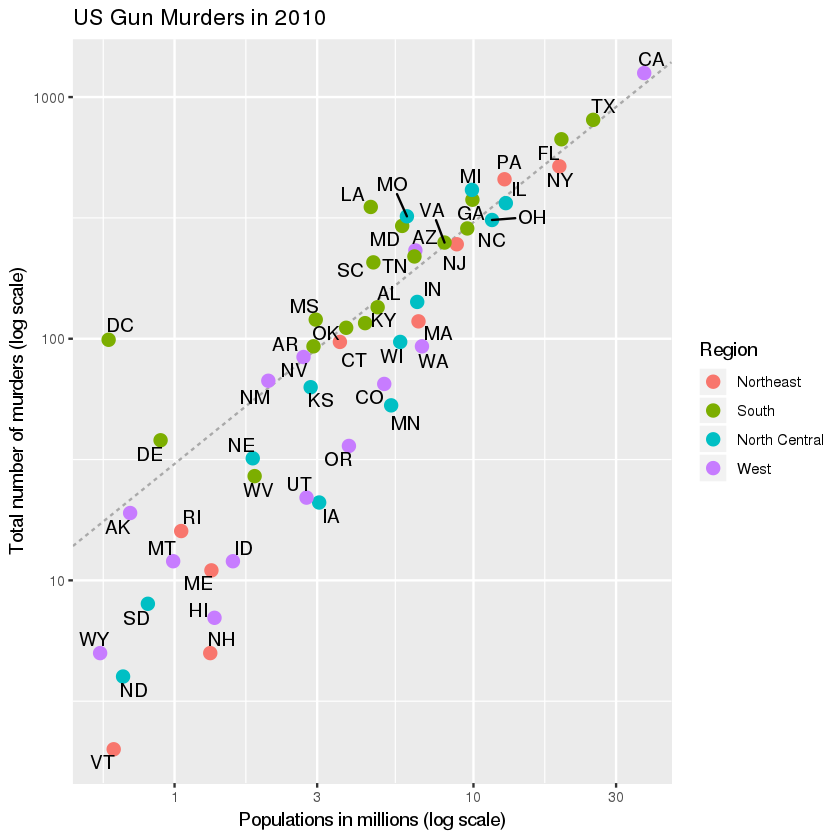

In [8]:
library(ggrepel)
library(ggthemes)
murders %>% ggplot(aes(x = population/10^6, y = total, label = abb)) +
  geom_abline(intercept = log10(r), lty=2, col="darkgrey") +
  geom_point(aes(color=region), size = 3) +
  geom_text_repel() +
  scale_x_log10() +
  scale_y_log10() +
  xlab("Populations in millions (log scale)") +
  ylab("Total number of murders (log scale)") +
  ggtitle("US Gun Murders in 2010") +
  scale_color_discrete(name="Region") 

---
[Back to top](#top)
## GAPMINDER <a name=gapminder></a>

In [12]:
data("gapminder")
?gapminder

#write.csv(gapminder, "Data/gapminder.csv" ,row.names=FALSE)

In [10]:
head(gapminder)

country             year infant_mortality life_expectancy fertility
1 Albania             1960 115.40           62.87           6.19     
2 Algeria             1960 148.20           47.50           7.65     
3 Angola              1960 208.00           35.98           7.32     
4 Antigua and Barbuda 1960     NA           62.97           4.43     
5 Argentina           1960  59.87           65.39           3.11     
6 Armenia             1960     NA           66.86           4.55     
  population gdp          continent region         
1  1636054             NA Europe    Southern Europe
2 11124892    13828152297 Africa    Northern Africa
3  5270844             NA Africa    Middle Africa  
4    54681             NA Americas  Caribbean      
5 20619075   108322326649 Americas  South America  
6  1867396             NA Asia      Western Asia

In [11]:
str(gapminder)
summary(gapminder)

'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


                country           year      infant_mortality life_expectancy
 Albania            :   57   Min.   :1960   Min.   :  1.50   Min.   :13.20  
 Algeria            :   57   1st Qu.:1974   1st Qu.: 16.00   1st Qu.:57.50  
 Angola             :   57   Median :1988   Median : 41.50   Median :67.54  
 Antigua and Barbuda:   57   Mean   :1988   Mean   : 55.31   Mean   :64.81  
 Argentina          :   57   3rd Qu.:2002   3rd Qu.: 85.10   3rd Qu.:73.00  
 Armenia            :   57   Max.   :2016   Max.   :276.90   Max.   :83.90  
 (Other)            :10203                  NA's   :1453                    
   fertility       population             gdp               continent   
 Min.   :0.840   Min.   :3.124e+04   Min.   :4.040e+07   Africa  :2907  
 1st Qu.:2.200   1st Qu.:1.333e+06   1st Qu.:1.846e+09   Americas:2052  
 Median :3.750   Median :5.009e+06   Median :7.794e+09   Asia    :2679  
 Mean   :4.084   Mean   :2.701e+07   Mean   :1.480e+11   Europe  :2223  
 3rd Qu.:6.000   3r

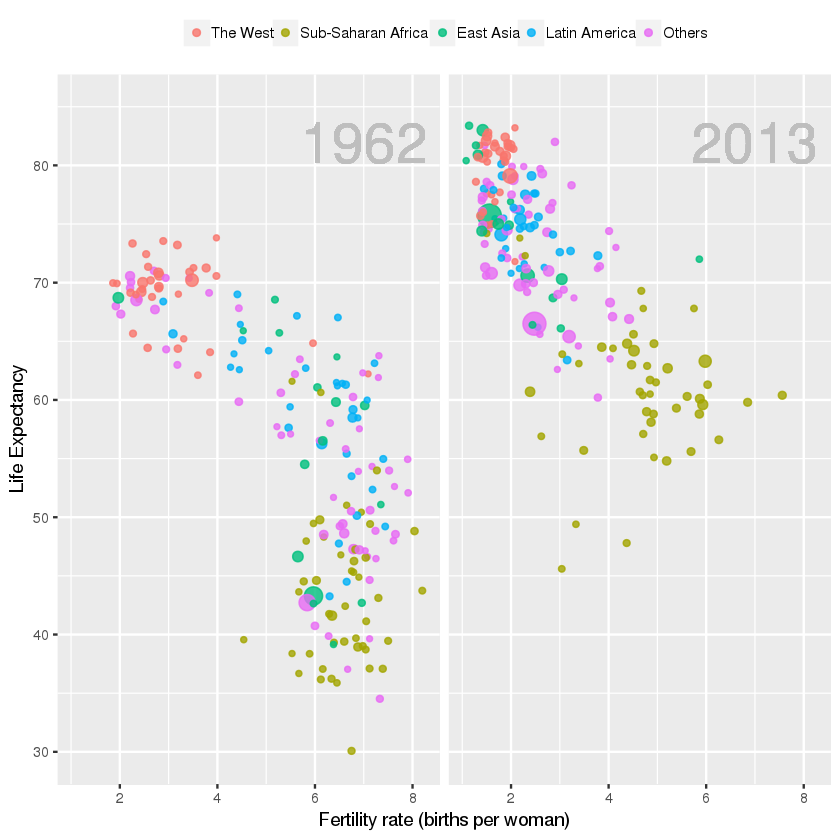

In [12]:
west <- c("Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand")

gapminder <- gapminder %>%
  mutate(group = case_when(
    region %in% west ~ "The West",
    region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
    region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
    continent == "Africa" & region != "Northern Africa" ~ "Sub-Saharan Africa",
    TRUE ~ "Others"))
gapminder <- gapminder %>%
  mutate(group = factor(group, levels = rev(c("Others", "Latin America", "East Asia","Sub-Saharan Africa", "The West"))))

filter(gapminder, year%in%c(1962, 2013) & !is.na(group) &
         !is.na(fertility) & !is.na(life_expectancy)) %>%
  mutate(population_in_millions = population/10^6) %>%
  ggplot( aes(fertility, y=life_expectancy, col = group, size = population_in_millions)) +
  geom_point(alpha = 0.8) + 
  guides(size=FALSE) +
  theme(plot.title = element_blank(), legend.title = element_blank()) +
  coord_cartesian(ylim = c(30, 85)) +
  xlab("Fertility rate (births per woman)") +
  ylab("Life Expectancy") +
  geom_text(aes(x=7, y=82, label=year), cex=12, color="grey") +
  facet_grid(. ~ year) +
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        strip.text.y = element_blank(),
   legend.position = "top")

In [13]:
gapminder$gdppc = gapminder$gdp/gapminder$population
gapminder2 <- gapminder[,c(1,2,4,6,8,9,11)]
head(gapminder2)

country             year life_expectancy population continent region         
1 Albania             1960 62.87            1636054   Europe    Southern Europe
2 Algeria             1960 47.50           11124892   Africa    Northern Africa
3 Angola              1960 35.98            5270844   Africa    Middle Africa  
4 Antigua and Barbuda 1960 62.97              54681   Americas  Caribbean      
5 Argentina           1960 65.39           20619075   Americas  South America  
6 Armenia             1960 66.86            1867396   Asia      Western Asia   
  gdppc   
1       NA
2 1242.992
3       NA
4       NA
5 5253.501
6       NA

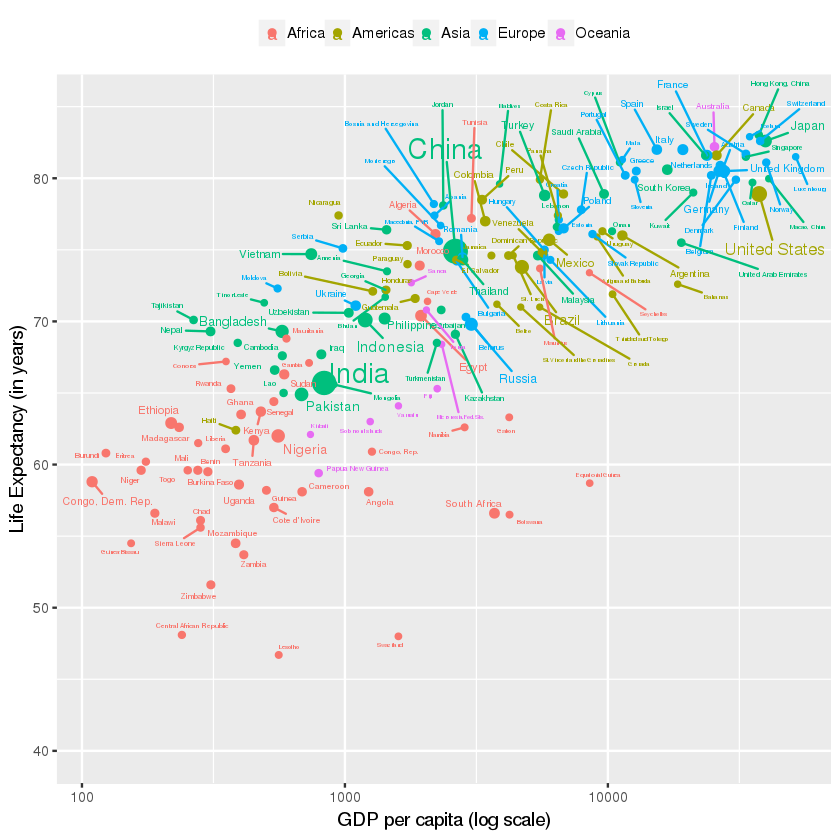

In [14]:
filter(gapminder2, year%in%c(2011) & !is.na(gdppc) & !is.na(life_expectancy)) %>%
  mutate(population_in_millions = (population/10^6)) %>%
  ggplot( aes(x=gdppc, y=life_expectancy, col = continent, size = population_in_millions, label = country)) +
  geom_point(alpha = 1) + 
  geom_text_repel() +
  guides(size=FALSE) +
  theme(plot.title = element_blank(), legend.title = element_blank()) +
  coord_cartesian(ylim = c(40, 85)) +
  scale_x_log10() +
  xlab("GDP per capita (log scale)") +
  ylab("Life Expectancy (in years)") +
  ggtitle("Health and Wealth of Nations (2011)") +
  #facet_grid(. ~ year) +
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        strip.text.y = element_blank(),
   legend.position = "top")

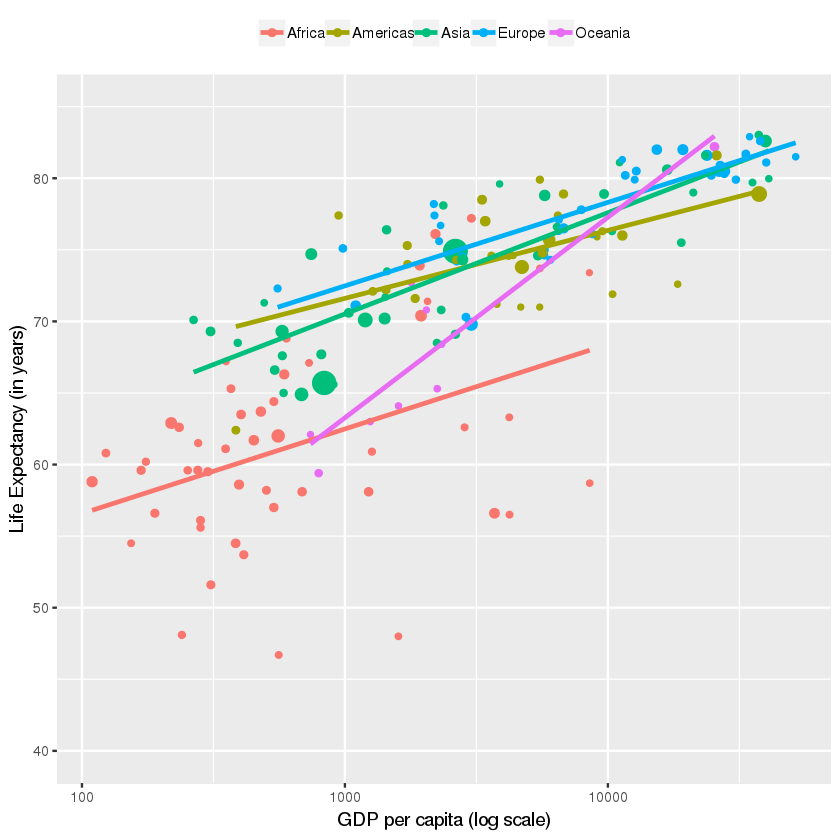

In [15]:
filter(gapminder2, year%in%c(2011) & !is.na(gdppc) & !is.na(life_expectancy)) %>%
  mutate(population_in_millions = (population/10^6)) %>%
  ggplot( aes(x=gdppc, y=life_expectancy, col = continent, size = population_in_millions, label = country)) +
  geom_point(alpha = 1) + 
  geom_smooth(method='lm',formula=y~x, se=FALSE) + 
  guides(size=FALSE) +
  theme(plot.title = element_blank(), legend.title = element_blank()) +
  coord_cartesian(ylim = c(40, 85)) +
  scale_x_log10() +
  xlab("GDP per capita (log scale)") +
  ylab("Life Expectancy (in years)") +
  ggtitle("Health and Wealth of Nations (2011)") +
  #facet_grid(. ~ year) +
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        strip.text.y = element_blank(),
   legend.position = "top")

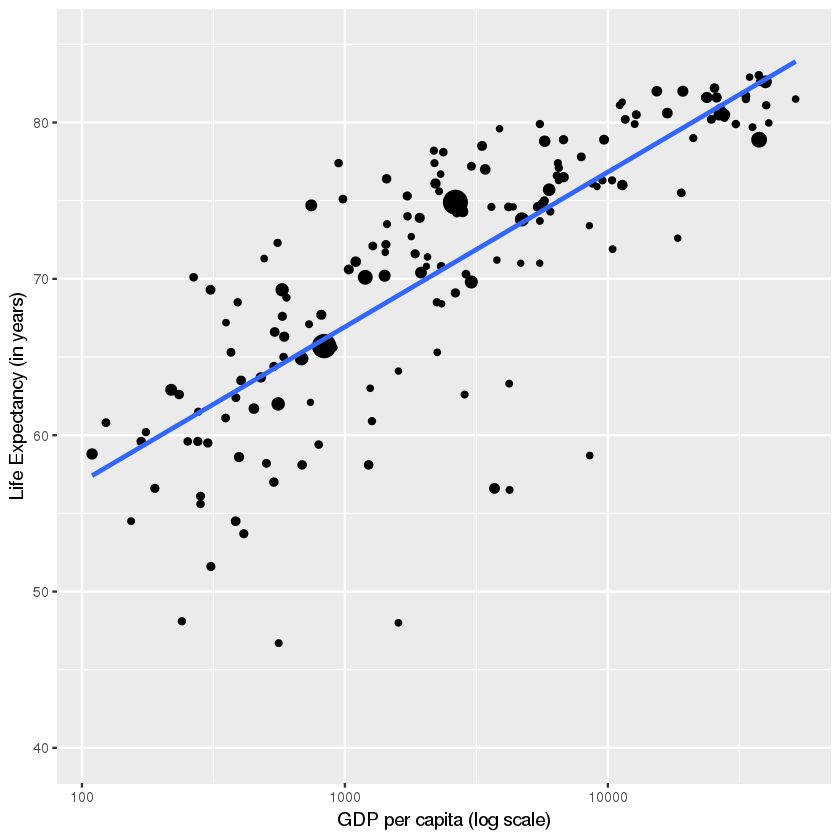

In [16]:
filter(gapminder2, year%in%c(2011) & !is.na(gdppc) & !is.na(life_expectancy)) %>%
  mutate(population_in_millions = (population/10^6)) %>%
  ggplot( aes(x=gdppc, y=life_expectancy, size = population_in_millions, label = country)) +
  geom_point(alpha = 1) + 
  geom_smooth(method='lm',formula=y~x, se=FALSE) + 
  guides(size=FALSE) +
  theme(plot.title = element_blank(), legend.title = element_blank()) +
  coord_cartesian(ylim = c(40, 85)) +
  scale_x_log10() +
  xlab("GDP per capita (log scale)") +
  ylab("Life Expectancy (in years)") +
  ggtitle("Health and Wealth of Nations (2011)") +
  #facet_grid(. ~ year) +
  theme(strip.background = element_blank(),
        strip.text.x = element_blank(),
        strip.text.y = element_blank(),
   legend.position = "top")

---
[Back to top](#top)
## FIVETHIRTYEIGHT's 2016 POLL DATA <a name=538></a>


In [15]:
data(polls_us_election_2016)
?polls_us_election_2016

#write.csv(polls_us_election_2016, "Data/polls_us_election_2016.csv", row.names=FALSE) 
head(polls_us_election_2016)
str(polls_us_election_2016)
summary(polls_us_election_2016)

state startdate  enddate   
1 U.S.  2016-11-03 2016-11-06
2 U.S.  2016-11-01 2016-11-07
3 U.S.  2016-11-02 2016-11-06
4 U.S.  2016-11-04 2016-11-07
5 U.S.  2016-11-03 2016-11-06
6 U.S.  2016-11-03 2016-11-06
  pollster                                                   grade samplesize
1 ABC News/Washington Post                                   A+     2220     
2 Google Consumer Surveys                                    B     26574     
3 Ipsos                                                      A-     2195     
4 YouGov                                                     B      3677     
5 Gravis Marketing                                           B-    16639     
6 Fox News/Anderson Robbins Research/Shaw & Company Research A      1295     
  population rawpoll_clinton rawpoll_trump rawpoll_johnson rawpoll_mcmullin
1 lv         47.00           43.00         4.00            NA              
2 lv         38.03           35.69         5.46            NA              
3 lv         42.00           39.00         6.00            NA              
4 lv         45.00           41.00         5.00            NA              
5 rv         47.00           43.00         3.00            NA              
6 lv         48.00           44.00         3.00            NA              
  adjpoll_clinton adjpoll_trump adjpoll_johnson adjpoll_mcmullin
1 45.20163        41.72430      4.626221        NA              
2 43.34557        41.21439      5.175792        NA              
3 42.02638        38.81620      6.844734        NA              
4 45.65676        40.92004      6.069454        NA              
5 46.84089        42.33184      3.726098        NA              
6 49.02208        43.95631      3.057876        NA

'data.frame':	4208 obs. of  15 variables:
 $ state           : Factor w/ 57 levels "Alabama","Alaska",..: 50 50 50 50 50 50 50 50 37 50 ...
 $ startdate       : Date, format: "2016-11-03" "2016-11-01" ...
 $ enddate         : Date, format: "2016-11-06" "2016-11-07" ...
 $ pollster        : Factor w/ 196 levels "ABC News/Washington Post",..: 1 63 81 194 65 55 18 113 195 76 ...
 $ grade           : Factor w/ 10 levels "D","C-","C","C+",..: 10 6 8 6 5 9 8 8 NA 8 ...
 $ samplesize      : int  2220 26574 2195 3677 16639 1295 1426 1282 8439 1107 ...
 $ population      : chr  "lv" "lv" "lv" "lv" ...
 $ rawpoll_clinton : num  47 38 42 45 47 ...
 $ rawpoll_trump   : num  43 35.7 39 41 43 ...
 $ rawpoll_johnson : num  4 5.46 6 5 3 3 5 6 6 7.1 ...
 $ rawpoll_mcmullin: num  NA NA NA NA NA NA NA NA NA NA ...
 $ adjpoll_clinton : num  45.2 43.3 42 45.7 46.8 ...
 $ adjpoll_trump   : num  41.7 41.2 38.8 40.9 42.3 ...
 $ adjpoll_johnson : num  4.63 5.18 6.84 6.07 3.73 ...
 $ adjpoll_mcmullin: num  NA N

            state        startdate             enddate          
 U.S.          :1106   Min.   :2015-11-06   Min.   :2015-11-08  
 Florida       : 148   1st Qu.:2016-08-10   1st Qu.:2016-08-21  
 North Carolina: 125   Median :2016-09-23   Median :2016-09-30  
 Pennsylvania  : 125   Mean   :2016-08-31   Mean   :2016-09-06  
 Ohio          : 115   3rd Qu.:2016-10-20   3rd Qu.:2016-10-28  
 New Hampshire : 112   Max.   :2016-11-06   Max.   :2016-11-07  
 (Other)       :2477                                            
                                     pollster        grade     
 Ipsos                                   : 919   A-     :1085  
 Google Consumer Surveys                 : 743   B      :1011  
 SurveyMonkey                            : 660   C-     : 693  
 YouGov                                  : 130   C+     : 329  
 Rasmussen Reports/Pulse Opinion Research: 125   B+     : 204  
 USC Dornsife/LA Times                   : 121   (Other): 457  
 (Other)                        

Warning message:
“Removed 22 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 22 rows containing missing values (geom_point).”

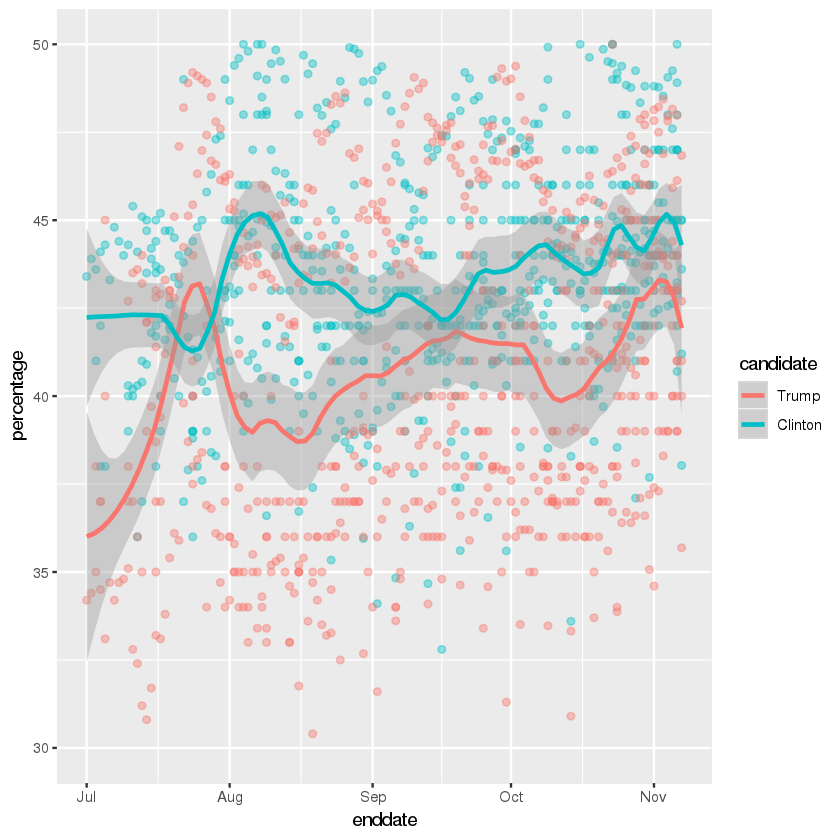

In [18]:
polls_us_election_2016 %>%
  filter(state == "U.S." & enddate>="2016-07-01") %>%
  select(enddate, pollster, rawpoll_clinton, rawpoll_trump) %>%
  rename(Clinton = rawpoll_clinton, Trump = rawpoll_trump) %>%
  gather(candidate, percentage, -enddate, -pollster) %>% 
  mutate(candidate = factor(candidate, levels = c("Trump","Clinton")))%>%
  group_by(pollster) %>%
  filter(n()>=10) %>%
  ungroup() %>%
  ggplot(aes(enddate, percentage, color = candidate)) +  
  geom_point(show.legend = FALSE, alpha=0.4)  + 
  geom_smooth(method = "loess", span = 0.15) +
  scale_y_continuous(limits = c(30,50))

---
[Back to top](#top)
## CONTAGIOUS DISEASES (US STATES) <a name=diseases></a>

In [14]:
library(RColorBrewer)
data("us_contagious_diseases")

#write.csv(us_contagious_diseases, "Data/us_contagious_diseases.csv", row.names=FALSE)
?us_contagious_diseases
head(us_contagious_diseases)
str(us_contagious_diseases)
summary(us_contagious_diseases)

disease     state   year weeks_reporting count population
1 Hepatitis A Alabama 1966 50              321   3345787   
2 Hepatitis A Alabama 1967 49              291   3364130   
3 Hepatitis A Alabama 1968 52              314   3386068   
4 Hepatitis A Alabama 1969 49              380   3412450   
5 Hepatitis A Alabama 1970 51              413   3444165   
6 Hepatitis A Alabama 1971 51              378   3481798

'data.frame':	18870 obs. of  6 variables:
 $ disease        : Factor w/ 7 levels "Hepatitis A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state          : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year           : num  1966 1967 1968 1969 1970 ...
 $ weeks_reporting: int  50 49 52 49 51 51 45 45 45 46 ...
 $ count          : num  321 291 314 380 413 378 342 467 244 286 ...
 $ population     : num  3345787 3364130 3386068 3412450 3444165 ...


        disease            state            year      weeks_reporting
 Hepatitis A:2346   Alabama   :  370   Min.   :1928   Min.   : 0.00  
 Measles    :3876   Alaska    :  370   1st Qu.:1956   1st Qu.:14.00  
 Mumps      :1836   Arizona   :  370   Median :1977   Median :44.00  
 Pertussis  :3774   Arkansas  :  370   Mean   :1974   Mean   :33.28  
 Polio      :3774   California:  370   3rd Qu.:1992   3rd Qu.:50.00  
 Rubella    :1938   Colorado  :  370   Max.   :2011   Max.   :52.00  
 Smallpox   :1326   (Other)   :16650                                 
     count            population      
 Min.   :     0.0   Min.   :   86853  
 1st Qu.:     1.0   1st Qu.: 1046542  
 Median :    47.0   Median : 2824918  
 Mean   :  1367.5   Mean   : 4242911  
 3rd Qu.:   440.8   3rd Qu.: 5153640  
 Max.   :132342.0   Max.   :37607525  
                    NA's   :204       

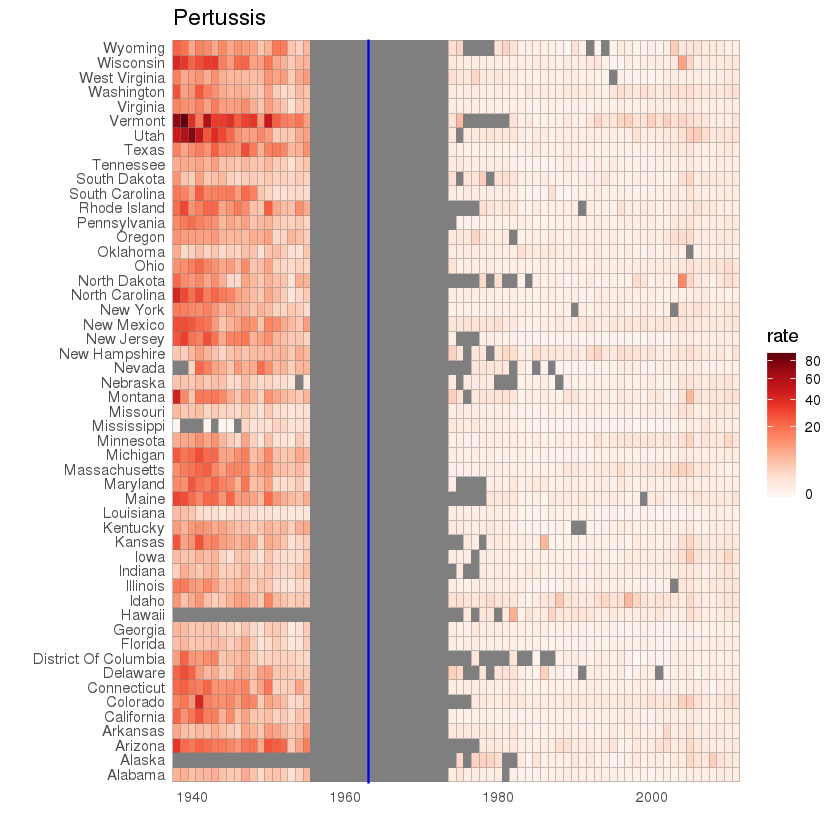

In [20]:
the_disease <- "Pertussis"
us_contagious_diseases %>%
  filter(disease ==  the_disease) %>%
  mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>%
  mutate(state = reorder(state, rate)) %>%
  ggplot(aes(year, state,  fill = rate)) +
  geom_tile(color = "grey50") +
  scale_x_continuous(expand=c(0,0)) +
  scale_fill_gradientn(colors = brewer.pal(9, "Reds"), trans = "sqrt") +
  geom_vline(xintercept=1963, col = "blue") +
  theme_minimal() +  theme(panel.grid = element_blank()) +
  ggtitle(the_disease) +
  ylab("") +
  xlab("")

---
[Back to top](#top)
## ARTIFICIAL DATASET <a name=random></a>

In [21]:
library("ggplot2")
theme_set(theme_bw()) # use the black and white theme throughout
# artificial data:
d <- data.frame(x = c(1:8, 1:8), y = runif(16),
  group1 = rep(gl(2, 4, labels = c("a", "b")), 2),
  group2 = gl(2, 8))
head(d)

x y         group1 group2
1 1 0.6751481 a      1     
2 2 0.9257979 a      1     
3 3 0.3784164 a      1     
4 4 0.5596571 a      1     
5 5 0.8495309 b      1     
6 6 0.7915544 b      1

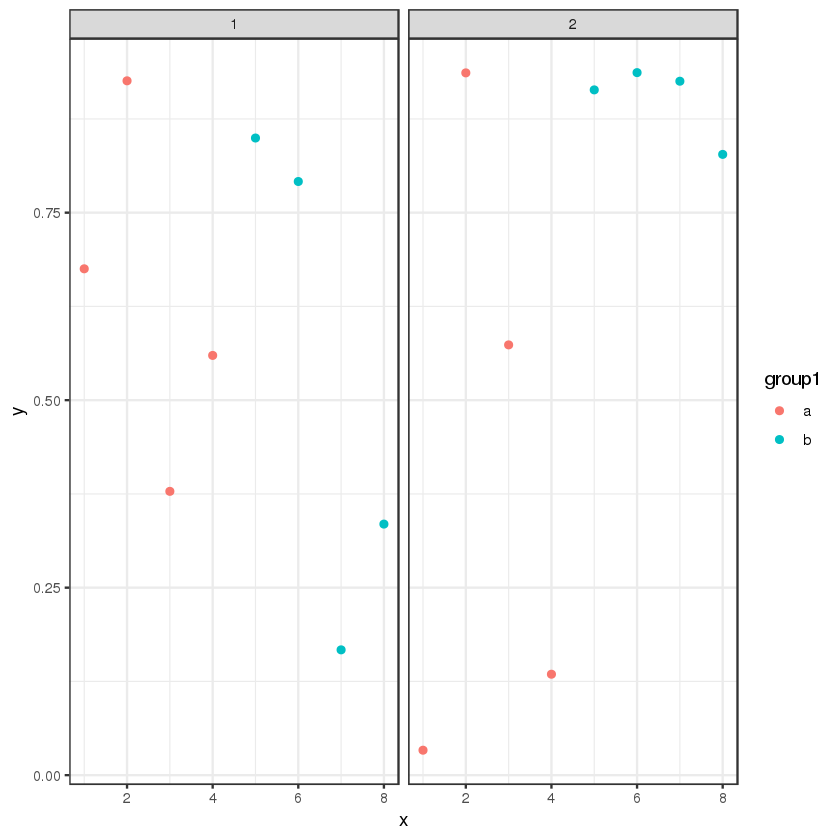

In [22]:
ggplot(data = d) + geom_point(aes(x, y, colour = group1)) +
  facet_grid(~group2)

---
[Back to top](#top)
## NEW YORK CHORAL SOCIETY SINGERS <a name=singers></a>

In [23]:
library("ggplot2")
data(singer, package="lattice")
?singer
summary(singer,8)
table(singer$height,singer$voice.part)

     height         voice.part
 Min.   :60.0   Bass 2   :26  
 1st Qu.:65.0   Bass 1   :39  
 Median :67.0   Tenor 2  :21  
 Mean   :67.3   Tenor 1  :21  
 3rd Qu.:70.0   Alto 2   :27  
 Max.   :76.0   Alto 1   :35  
                Soprano 2:30  
                Soprano 1:36  

    
     Bass 2 Bass 1 Tenor 2 Tenor 1 Alto 2 Alto 1 Soprano 2 Soprano 1
  60      0      0       0       0      0      1         3         1
  61      0      0       0       0      0      4         2         2
  62      0      0       0       0      0      3         5         6
  63      0      0       0       0      3      4         3         3
  64      0      0       0       2      5      3         4         1
  65      0      0       0       1      5      4         5        15
  66      1      2       1       3      6      7         3         6
  67      2      0       0       2      2      4         3         1
  68      2      6       3       3      0      2         1         1
  69      1      3       7       1      1      1         0         0
  70      4      8       2       2      5      1         1         0
  71      1      6       6       2      0      0         0         0
  72      7      6       0       2      0      1         0         0
  73      0      3       1   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


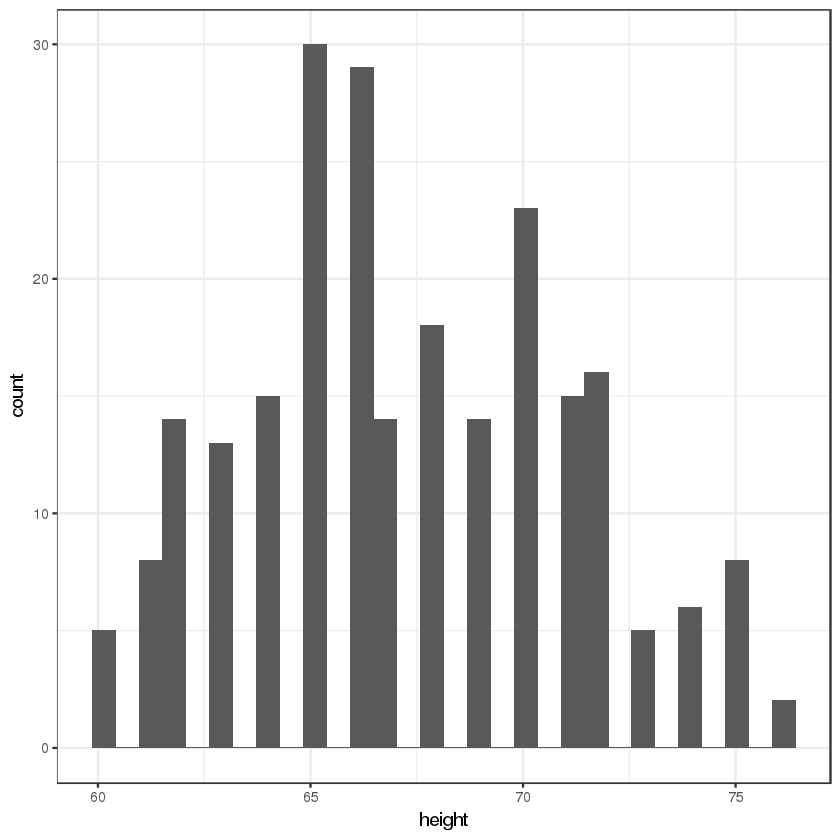

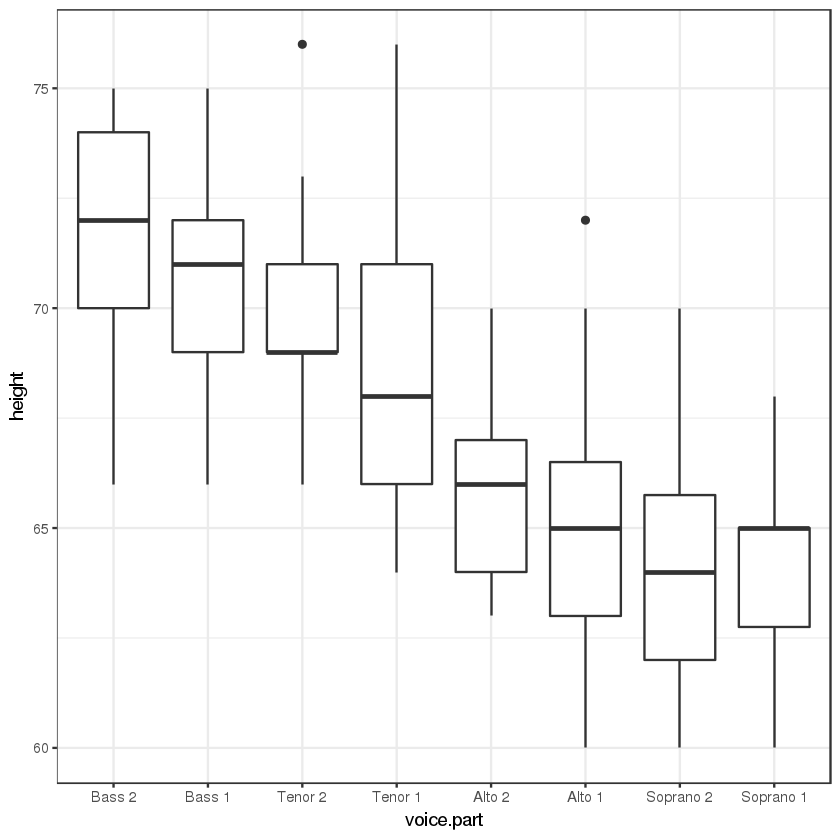

In [24]:
ggplot(singer, aes(x=height)) + geom_histogram()
ggplot(singer, aes(x=voice.part, y=height)) + geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


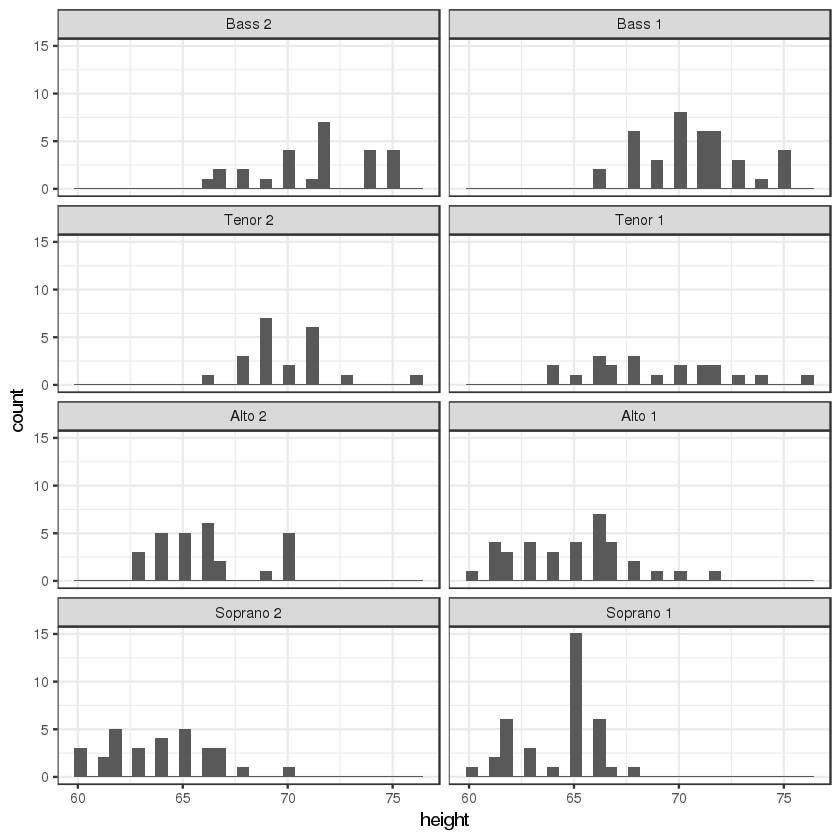

In [25]:
ggplot(data=singer, aes(x=height)) +
       geom_histogram() +
       facet_wrap(~voice.part, nrow=4)

---
[Back to top](#top)
## UNIVERSITY PROFESSORS SALARIES <a name=salaries></a>

In [17]:
data(Salaries, package="car")
#write.csv(Salaries,"Data/Salaries.csv",row.names=FALSE)
head(Salaries)
summary(Salaries)

rank      discipline yrs.since.phd yrs.service sex  salary
1 Prof      B          19            18          Male 139750
2 Prof      B          20            16          Male 173200
3 AsstProf  B           4             3          Male  79750
4 Prof      B          45            39          Male 115000
5 Prof      B          40            41          Male 141500
6 AssocProf B           6             6          Male  97000

        rank     discipline yrs.since.phd    yrs.service        sex     
 AsstProf : 67   A:181      Min.   : 1.00   Min.   : 0.00   Female: 39  
 AssocProf: 64   B:216      1st Qu.:12.00   1st Qu.: 7.00   Male  :358  
 Prof     :266              Median :21.00   Median :16.00               
                            Mean   :22.31   Mean   :17.61               
                            3rd Qu.:32.00   3rd Qu.:27.00               
                            Max.   :56.00   Max.   :60.00               
     salary      
 Min.   : 57800  
 1st Qu.: 91000  
 Median :107300  
 Mean   :113706  
 3rd Qu.:134185  
 Max.   :231545  

Warning message:
“Ignoring unknown parameters: side”

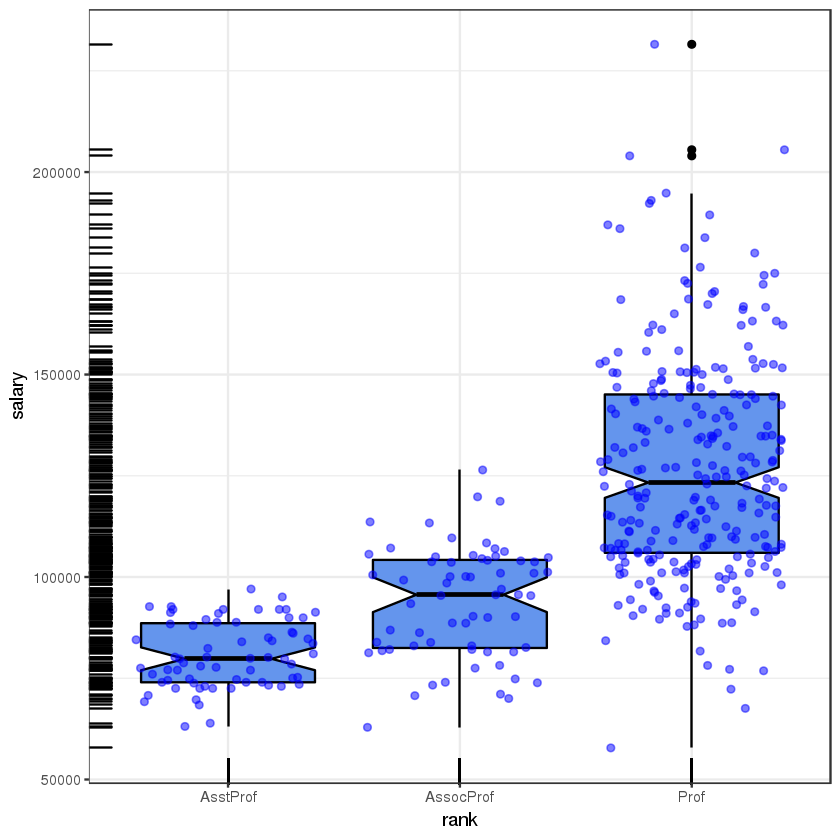

In [27]:
ggplot(Salaries, aes(x=rank, y=salary)) +
       geom_boxplot(fill="cornflowerblue",
       color="black", notch=TRUE)+
       geom_point(position="jitter", color="blue", alpha=.5)+
       geom_rug(side="l", color="black")

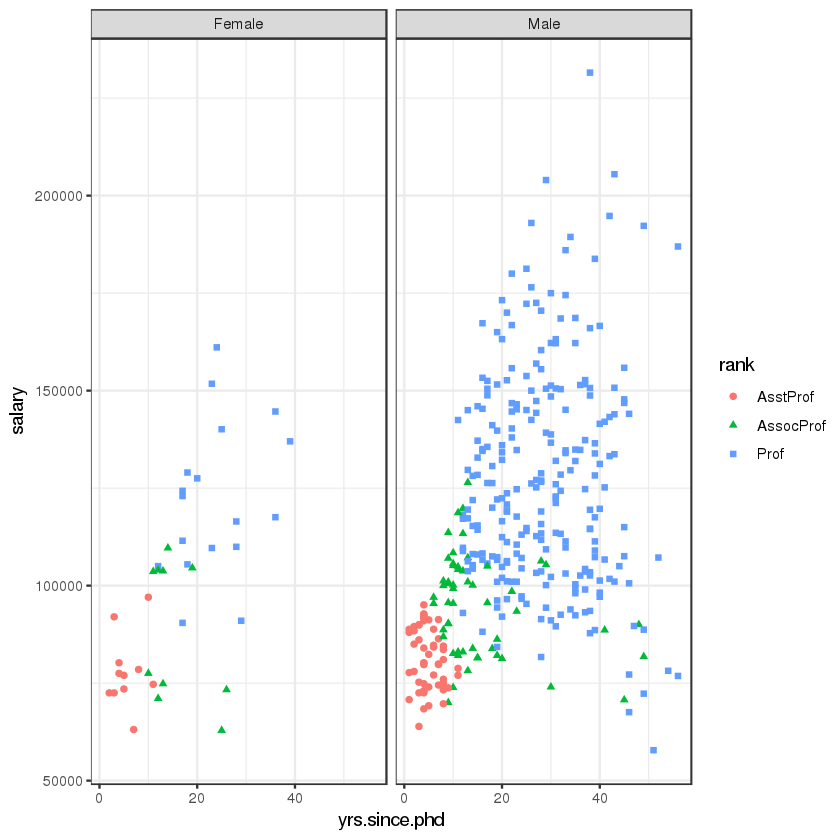

In [29]:
ggplot(Salaries, aes(x=yrs.since.phd, y=salary, color=rank,
       shape=rank)) + geom_point() + facet_grid(~sex)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



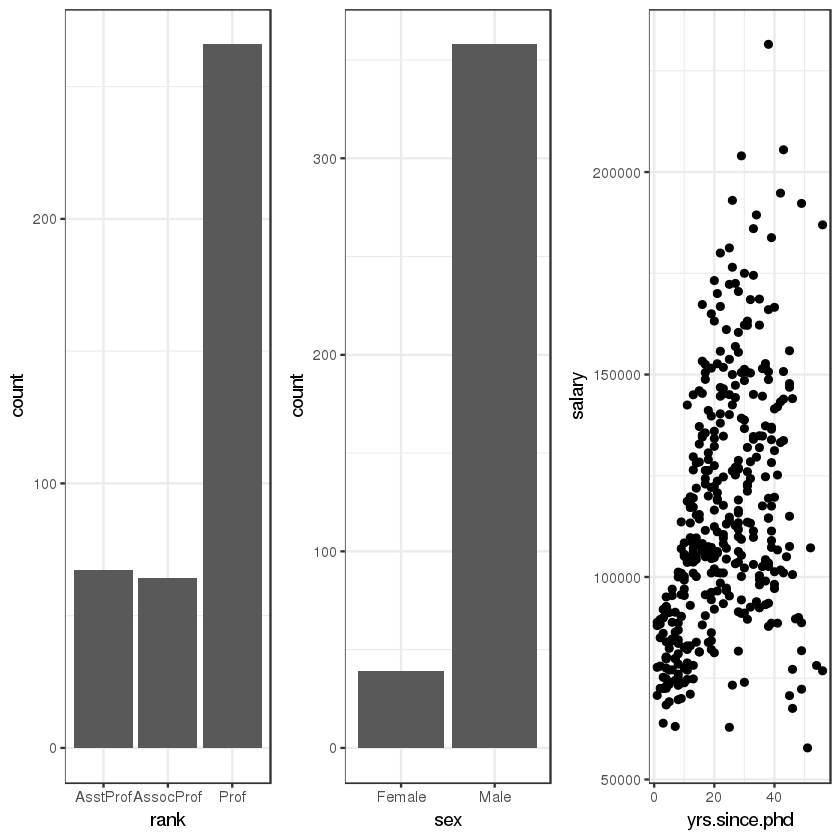

In [28]:
p1 <- ggplot(data=Salaries, aes(x=rank)) + geom_bar()
p2 <- ggplot(data=Salaries, aes(x=sex)) + geom_bar()
p3 <- ggplot(data=Salaries, aes(x=yrs.since.phd, y=salary)) + geom_point()

library(gridExtra)
grid.arrange(p1, p2, p3, ncol=3)


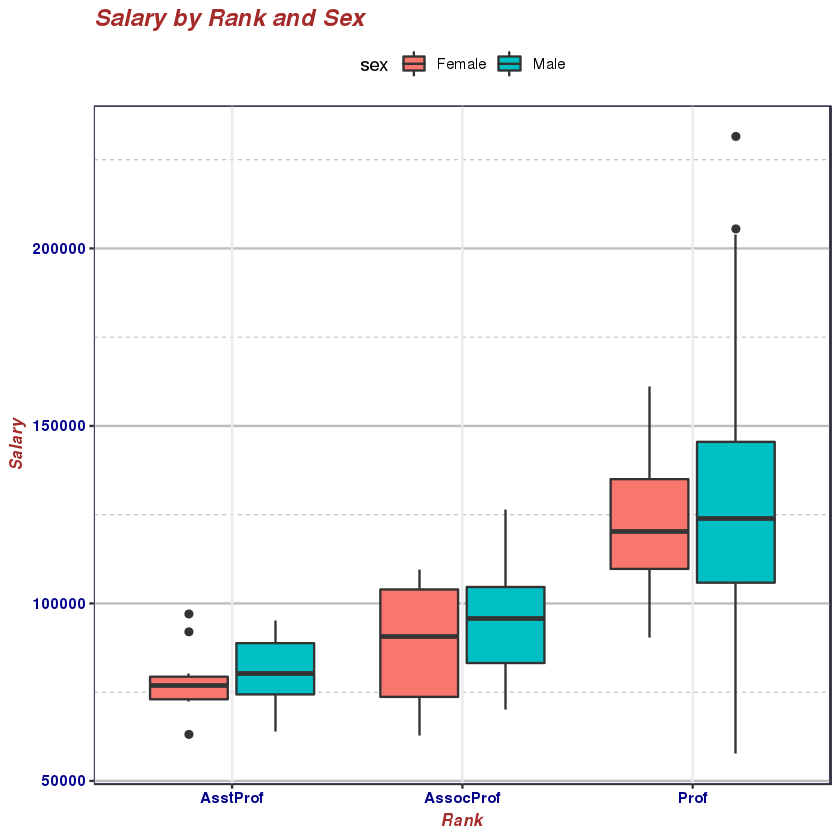

In [115]:
data(Salaries, package="car")
library(ggplot2)
mytheme <- theme(plot.title=element_text( 
                face="bold.italic", size="14", 
                color="brown"), axis.title= 
                element_text( face="bold.italic",
                    size=10, color="brown"),
                axis.text=element_text( 
                    face="bold", size=9,
                    color="darkblue"),
                panel.background=element_rect( 
                    fill="white",color="darkblue"),
                panel.grid.major.y=element_line( 
                    color="grey", linetype=1),
                panel.grid.minor.y=element_line( 
                    color="grey", linetype=2),
                panel.grid.minor.x=element_blank(),
                legend.position="top")

ggplot(Salaries, aes(x=rank, y=salary, fill=sex)) +
       geom_boxplot() +
       labs(title="Salary by Rank and Sex", x="Rank", y="Salary") +
       mytheme

---
[Back to top](#top)
## MPG <a name="mpg"></a>

In [29]:
head(mpg)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

In [30]:
?mpg

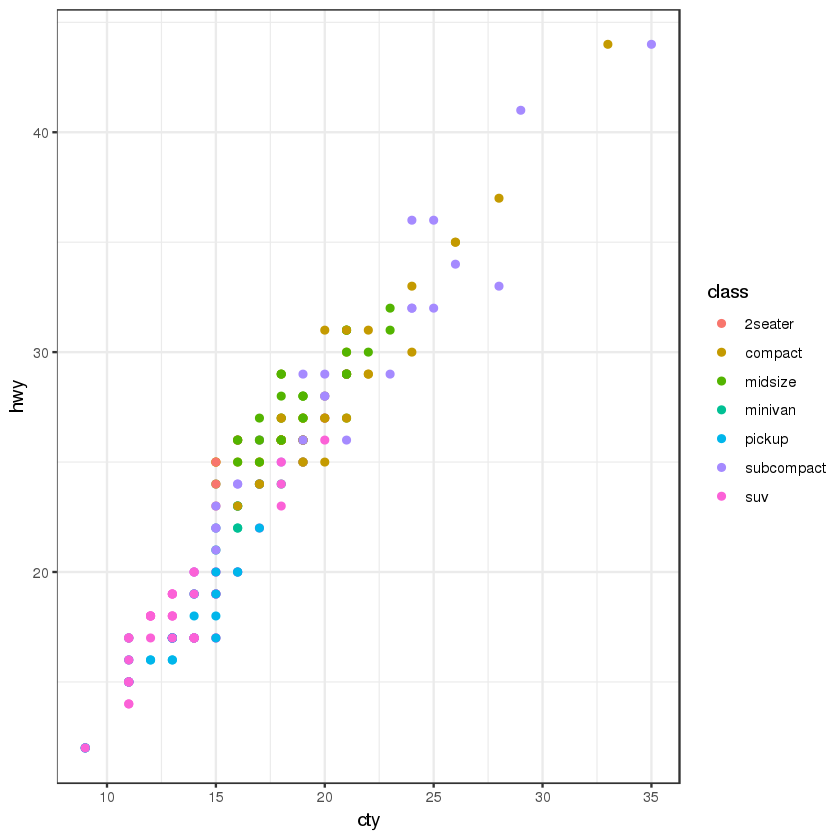

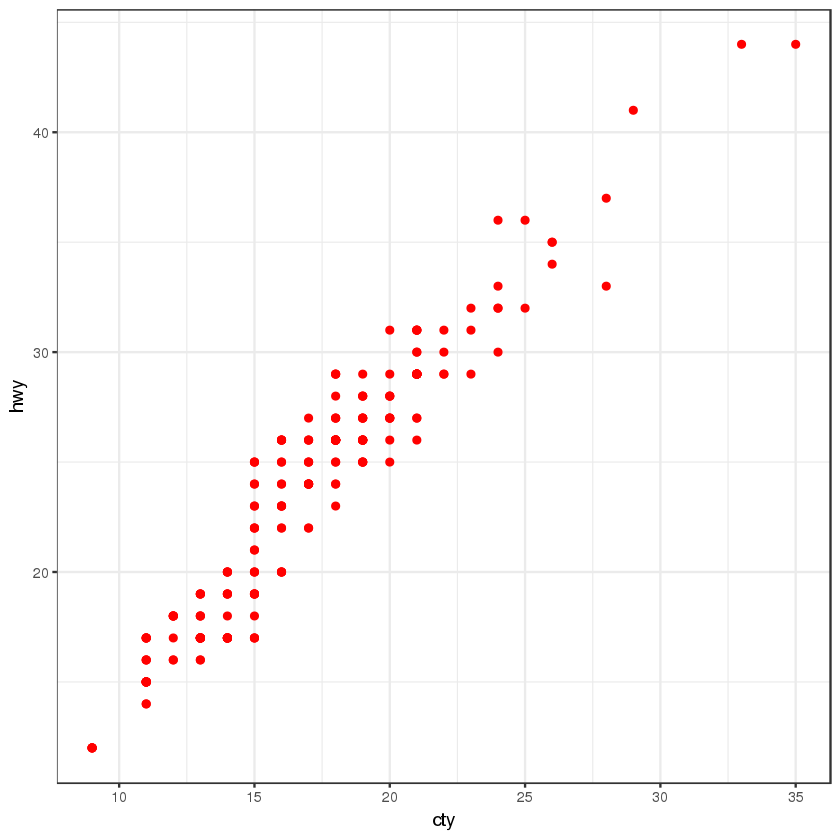

In [31]:
ggplot(mpg, aes(cty, hwy)) + geom_point(aes(colour = class))
ggplot(mpg, aes(cty, hwy)) + geom_point(colour = "red")


---
[Back to top](#top)
## WORLD PHONES <a name="phones"></a>

N.Amer Europe Asia S.Amer Oceania Africa Mid.Amer
1951 45939  21574  2876 1815   1646      89    555    
1956 60423  29990  4708 2568   2366    1411    733    
1957 64721  32510  5230 2695   2526    1546    773    
1958 68484  35218  6662 2845   2691    1663    836    
1959 71799  37598  6856 3000   2868    1769    911    
1960 76036  40341  8220 3145   3054    1905   1008

Var1 Var2   value
1 1951 N.Amer 45939
2 1956 N.Amer 60423
3 1957 N.Amer 64721
4 1958 N.Amer 68484
5 1959 N.Amer 71799
6 1960 N.Amer 76036

Year Continent Phones
1 1951 N.Amer    45939 
2 1956 N.Amer    60423 
3 1957 N.Amer    64721 
4 1958 N.Amer    68484 
5 1959 N.Amer    71799 
6 1960 N.Amer    76036

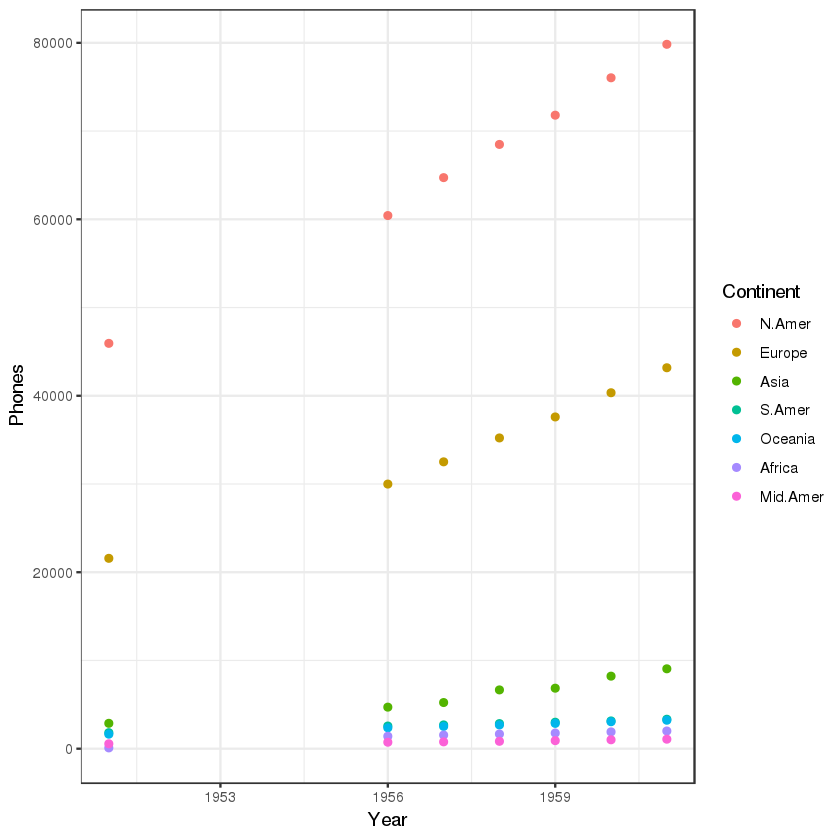

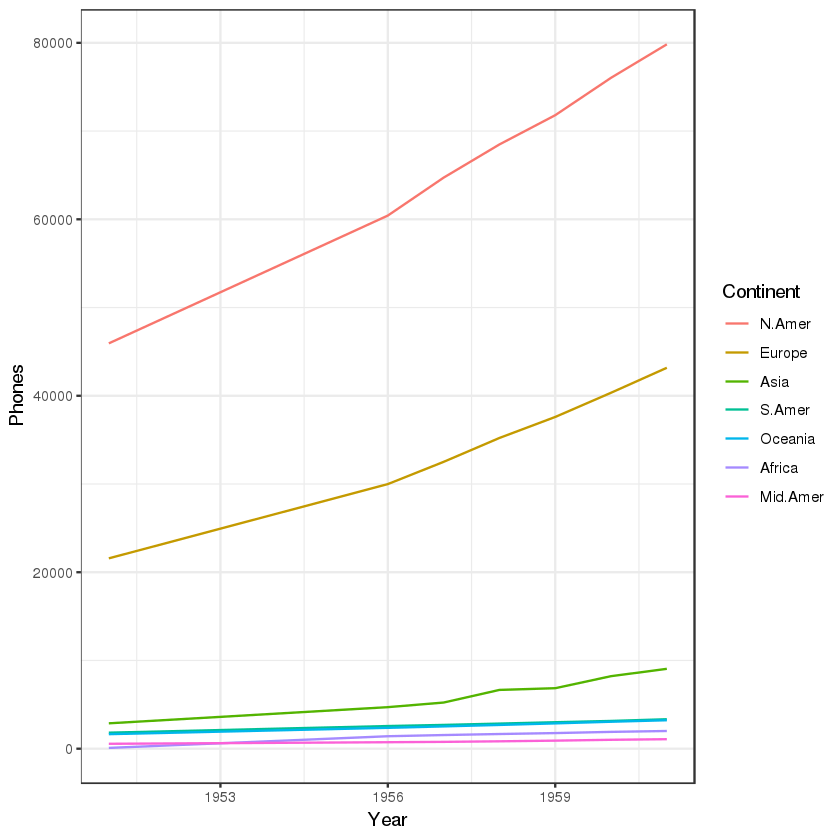

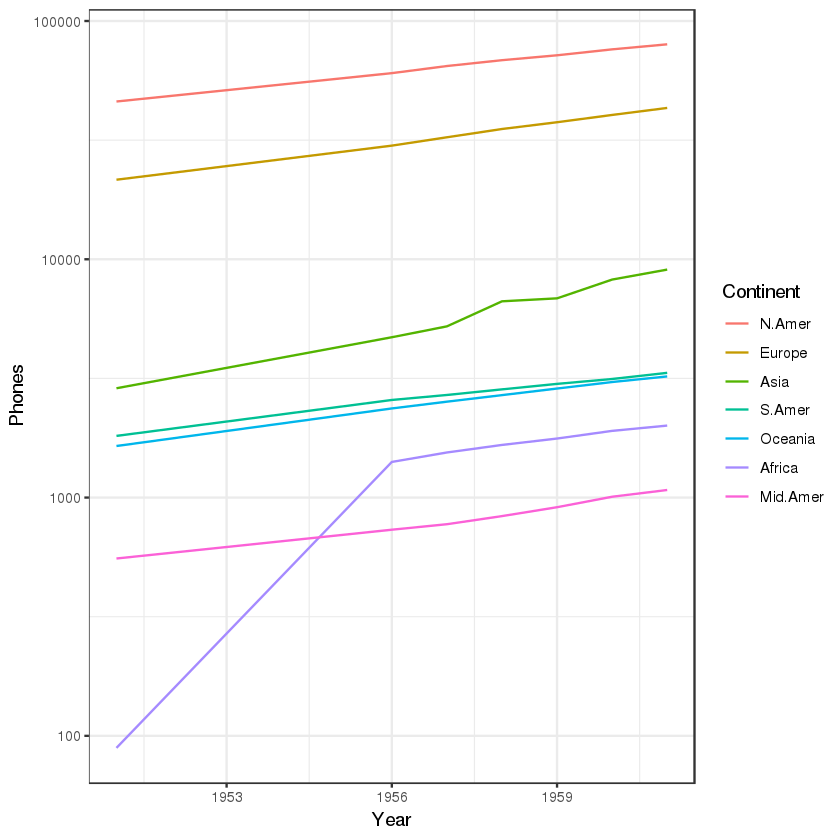

In [118]:
data("WorldPhones")
head(WorldPhones)
help(WorldPhones)
library(reshape2)
WorldPhones.m = melt(WorldPhones)
head(WorldPhones.m)
colnames(WorldPhones.m) = c("Year", "Continent", "Phones")
head(WorldPhones.m)
ggplot(WorldPhones.m, aes(x=Year, y=Phones, color=Continent)) + geom_point()
ggplot(WorldPhones.m, aes(x=Year, y=Phones, color=Continent)) + geom_line()
ggplot(WorldPhones.m, aes(x=Year, y=Phones, color=Continent)) + geom_line() + scale_y_log10()


---
[Back to top](#top)
## EXAMPLES <a name="examples"></a>

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

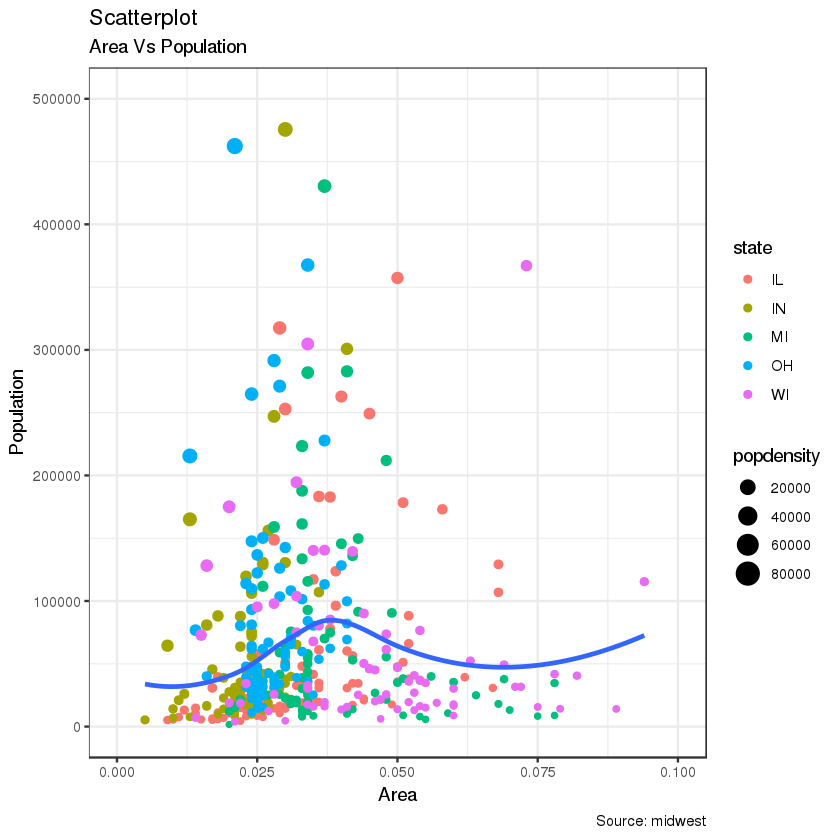

In [32]:
# install.packages("ggplot2")
# load package and data
options(scipen=999)  # turn-off scientific notation like 1e+48
library(ggplot2)
theme_set(theme_bw())  # pre-set the bw theme.
data("midwest", package = "ggplot2")
# midwest <- read.csv("http://goo.gl/G1K41K")  # bkup data source

# Scatterplot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + 
  xlim(c(0, 0.1)) + 
  ylim(c(0, 500000)) + 
  labs(subtitle="Area Vs Population", 
       y="Population", 
       x="Area", 
       title="Scatterplot", 
       caption = "Source: midwest")

plot(gg)

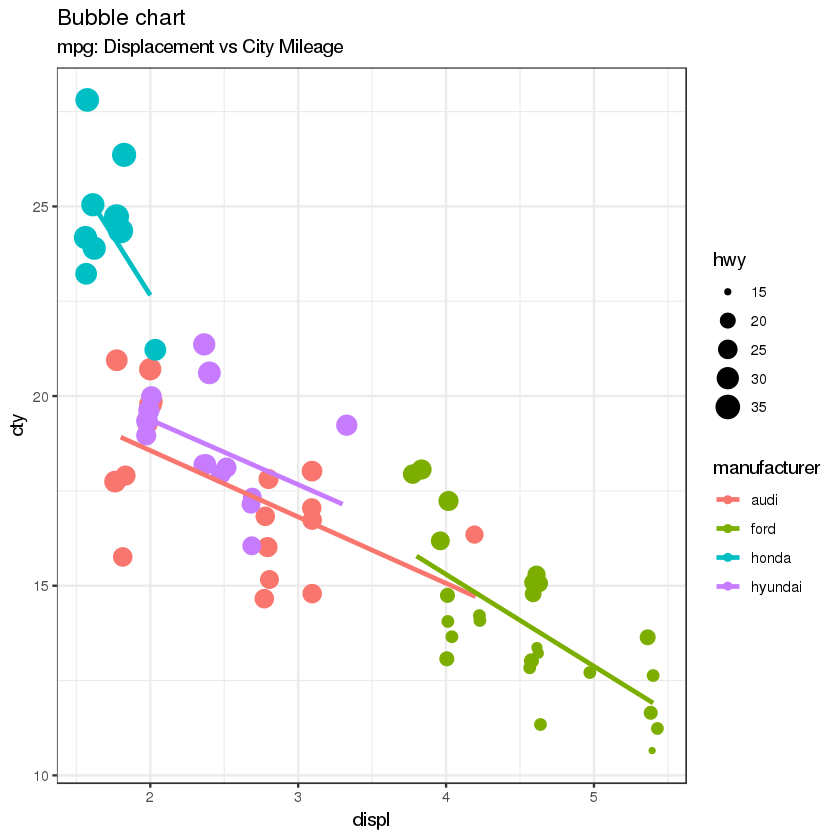

In [33]:
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"), ]

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
g <- ggplot(mpg_select, aes(displ, cty)) + 
  labs(subtitle="mpg: Displacement vs City Mileage",
       title="Bubble chart")

g + geom_jitter(aes(col=manufacturer, size=hwy)) + 
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

In [113]:
# Source: https://github.com/dgrtwo/gganimate
#install.packages("devtools")
# install.packages("cowplot")  # a gganimate dependency
# devtools::install_github("dgrtwo/gganimate")


library(ggplot2)
library(gganimate)
library(gapminder)
theme_set(theme_bw())  # pre-set the bw theme.

head(gapminder)

ggplot(gapminder, aes(gdppc, life_expectancy, size = population, colour = country)) +
  geom_point(alpha = 0.7, show.legend = FALSE) +
  #scale_colour_manual(values = country_colors) +
  scale_size(range = c(2, 12)) +
  scale_x_log10() +
  facet_wrap(~continent) +
  # Here comes the gganimate specific bits
  labs(title = 'Year: {frame_time}', x = 'GDP per capita', y = 'life expectancy') +
  transition_time(year) +
  ease_aes('linear')

anim_save(file="gapminder.gif") # saved, not plotted

country             year infant_mortality life_expectancy fertility
1 Albania             1960 115.40           62.87           6.19     
2 Algeria             1960 148.20           47.50           7.65     
3 Angola              1960 208.00           35.98           7.32     
4 Antigua and Barbuda 1960     NA           62.97           4.43     
5 Argentina           1960  59.87           65.39           3.11     
6 Armenia             1960     NA           66.86           4.55     
  population gdp          continent region          group              gdppc   
1  1636054             NA Europe    Southern Europe The West                 NA
2 11124892    13828152297 Africa    Northern Africa Others             1242.992
3  5270844             NA Africa    Middle Africa   Sub-Saharan Africa       NA
4    54681             NA Americas  Caribbean       Latin America            NA
5 20619075   108322326649 Americas  South America   Latin America      5253.501
6  1867396             NA Asia      Western Asia    Others                   NA

Warning message:
“Removed 90 rows containing missing values (geom_point).”Warning message:
“Removed 90 rows containing missing values (geom_point).”Warning message:
“Removed 91 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 89 rows containing missing values (geom_point).”Warning message:
“Removed 83 rows containing missing values (geom_point).”Warning message:
“Removed 83 rows containing missing values (geom_point).”Warning message:
“Removed 81 rows containing missing values (geom_point).”Warning message:
“Removed 80 rows cont

Frame 100 (100%)
Finalizing encoding... done!

In [36]:
library(ggplot2)
library(ggmap)
library(ggalt)

# Get Ottawa's Coordinates --------------------------------
ottawa<-geocode("Ottawa", src="dsk") # get longitude and latitude

# Get Coordinates for Ottawa's Places ---------------------
ottawa_places<-c("Canadian War Museum","Rideau Centre","University of Ottawa","Carleton University")
places_loc <- geocode(ottawa_places)  # get longitudes and latitudes

# Get the Map ----------------------------------------------
# Google Satellite Map
ottawa_ggl_sat_map <- qmap("ottawa", zoom=13, source = "google", maptype="satellite")  

# Google Hybrid Map
ottawa_ggl_hybrid_map <- qmap("ottawa", zoom=13, source = "google", maptype="hybrid")

# Google Road Map
ottawa_ggl_road_map <- qmap("ottawa", zoom=13, source = "google", maptype="roadmap") 

# Plot Google Road Map -------------------------------------
ottawa_ggl_road_map +  geom_point(aes(x=lon, y=lat),
                                 data = places_loc, 
                                 alpha = 0.8, 
                                 size = 7, 
                                 color = "tomato") + 
  geom_encircle(aes(x=lon, y=lat),
                data = places_loc, size = 2, color = "blue")

# Google Hybrid Map ----------------------------------------
ottawa_ggl_hybrid_map + geom_point(aes(x=lon, y=lat),
                                    data = places_loc, 
                                    alpha = 0.7, 
                                    size = 7, 
                                    color = "tomato") + 
  geom_encircle(aes(x=lon, y=lat),
                data = places_loc, size = 2, color = "blue")

# Google Satellite Map ----------------------------------------
ottawa_ggl_sat_map + geom_point(aes(x=lon, y=lat),
                                   data = places_loc, 
                                   alpha = 0.7, 
                                   size = 7, 
                                   color = "tomato") + 
  geom_encircle(aes(x=lon, y=lat),
                data = places_loc, size = 2, color = "blue")					

ERROR: Error in geocode("Ottawa", src = "dsk"): unused argument (src = "dsk")


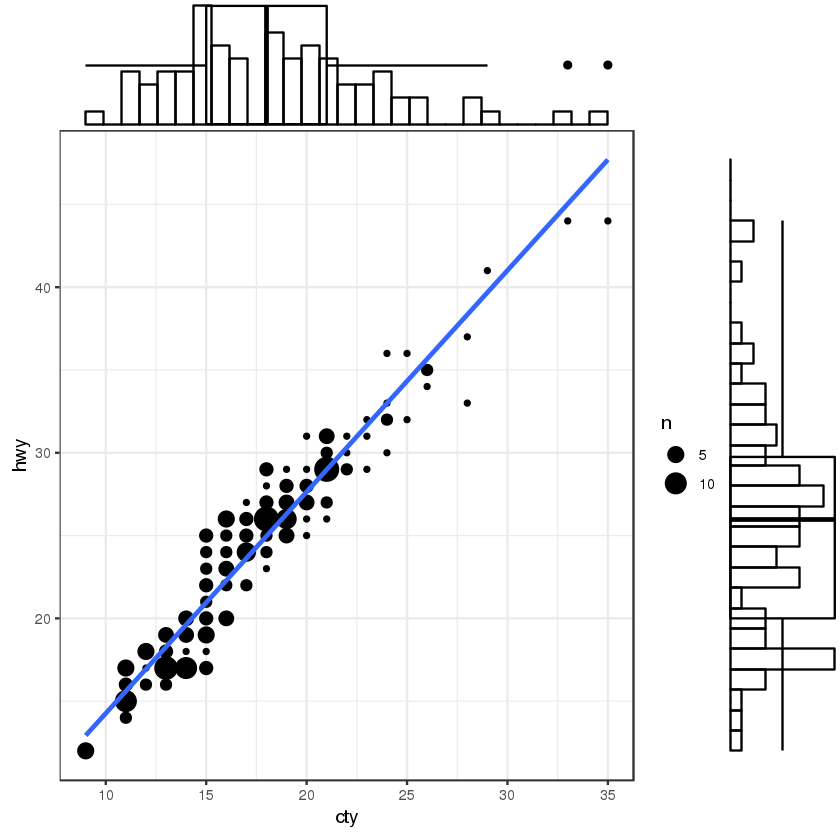

In [37]:
library(ggplot2)
library(ggExtra)
data(mpg, package="ggplot2")
# mpg <- read.csv("http://goo.gl/uEeRGu")

# Scatterplot
theme_set(theme_bw())  # pre-set the bw theme.
mpg_select <- mpg[mpg$hwy >= 35 & mpg$cty > 27, ]
g <- ggplot(mpg, aes(cty, hwy)) + 
  geom_count() + 
  geom_smooth(method="lm", se=F)

ggMarginal(g, type = "histogram", fill="transparent")
ggMarginal(g, type = "boxplot", fill="transparent")
# ggMarginal(g, type = "density", fill="transparent")

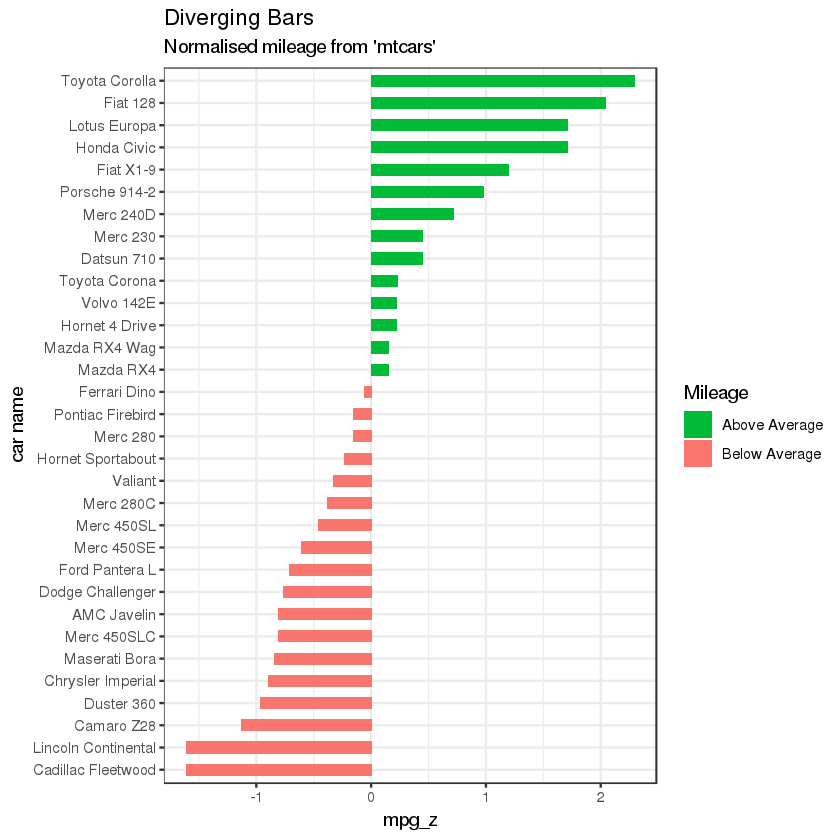

In [38]:
library(ggplot2)
theme_set(theme_bw())  
# Data Prep
data("mtcars")  # load data
mtcars$`car name` <- rownames(mtcars)  # create new column for car names
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)  # compute normalized mpg
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above")  # above / below avg flag
mtcars <- mtcars[order(mtcars$mpg_z), ]  # sort
mtcars$`car name` <- factor(mtcars$`car name`, levels = mtcars$`car name`)  # convert to factor to retain sorted order in plot.

# Diverging Barcharts
ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) + 
  geom_bar(stat='identity', aes(fill=mpg_type), width=.5)  +
  scale_fill_manual(name="Mileage", 
                    labels = c("Above Average", "Below Average"), 
                    values = c("above"="#00ba38", "below"="#f8766d")) + 
  labs(subtitle="Normalised mileage from 'mtcars'", 
       title= "Diverging Bars") + 
  coord_flip()


Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.


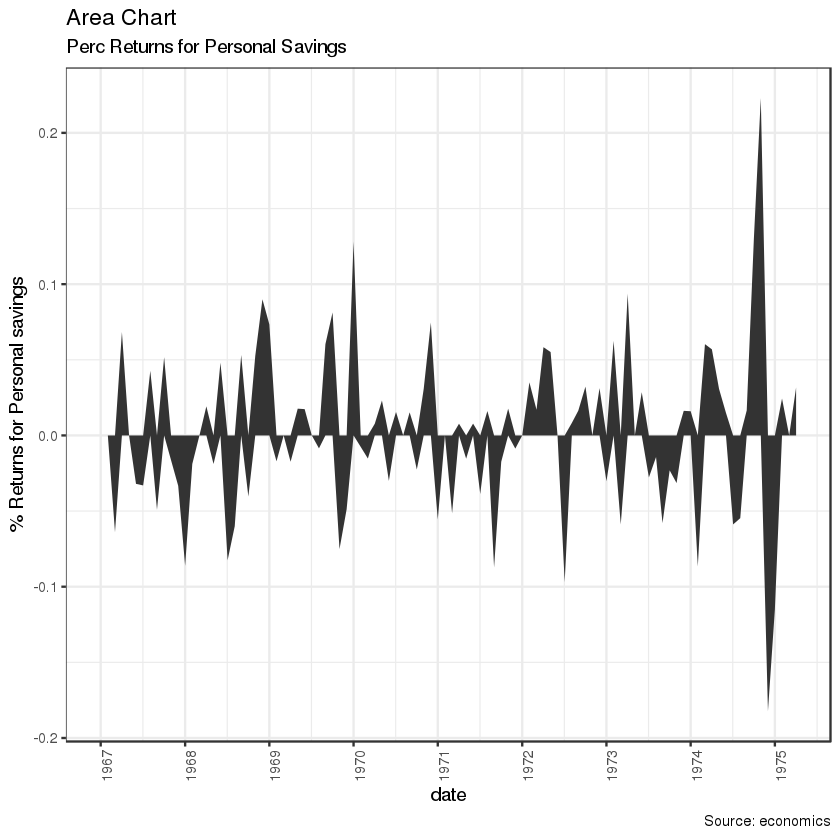

In [39]:
library(ggplot2)
#install.packages("quantmod")
library(quantmod)
data("economics", package = "ggplot2")

# Compute % Returns
economics$returns_perc <- c(0, diff(economics$psavert)/economics$psavert[-length(economics$psavert)])

# Create break points and labels for axis ticks
brks <- economics$date[seq(1, length(economics$date), 12)]
#install.packages("lubridate")
lbls <- lubridate::year(economics$date[seq(1, length(economics$date), 12)]) 

# Plot
ggplot(economics[1:100, ], aes(date, returns_perc)) + 
  geom_area() + 
  scale_x_date(breaks=brks, labels=lbls) + 
  theme(axis.text.x = element_text(angle=90)) + 
  labs(title="Area Chart", 
       subtitle = "Perc Returns for Personal Savings", 
       y="% Returns for Personal savings", 
       caption="Source: economics")


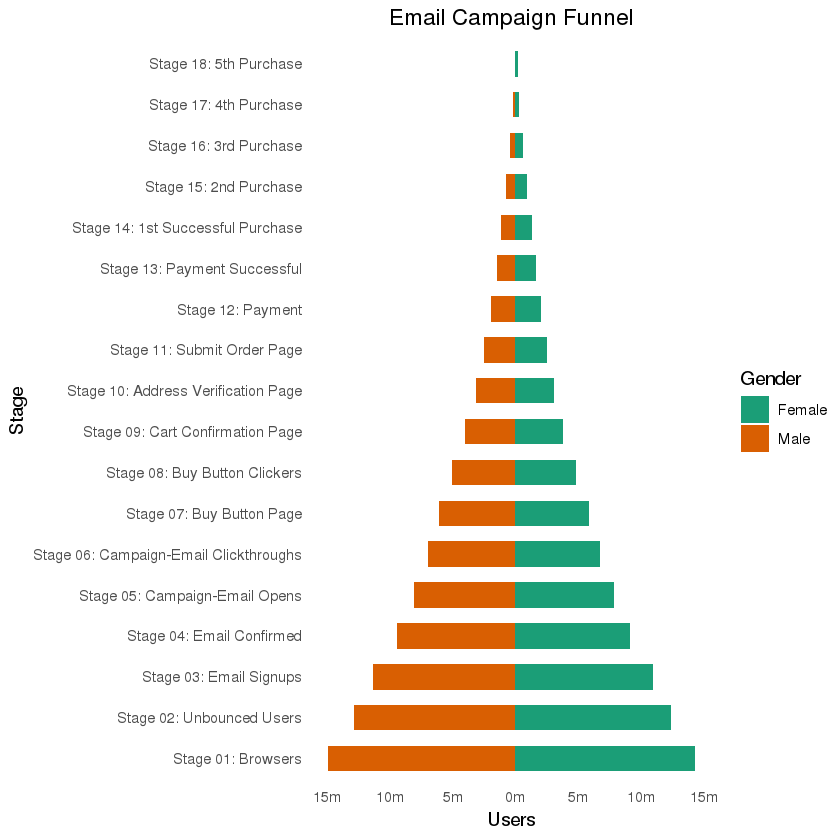

In [40]:
library(ggplot2)
library(ggthemes)
options(scipen = 999)  # turns of scientific notations like 1e+40
# Read data
email_campaign_funnel <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# X Axis Breaks and Labels 
brks <- seq(-15000000, 15000000, 5000000)
lbls = paste0(as.character(c(seq(15, 0, -5), seq(5, 15, 5))), "m")

# Plot
ggplot(email_campaign_funnel, aes(x = Stage, y = Users, fill = Gender)) +   # Fill column
                              geom_bar(stat = "identity", width = .6) +   # draw the bars
                              scale_y_continuous(breaks = brks,   # Breaks
                                                 labels = lbls) + # Labels
                              coord_flip() +  # Flip axes
                              labs(title="Email Campaign Funnel") +
                              theme_tufte() +  # Tufte theme from ggfortify
                              theme(plot.title = element_text(hjust = .5), 
                                    axis.ticks = element_blank()) +   # Centre plot title
                              scale_fill_brewer(palette = "Dark2")  # Color palette

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



year yearmonthf monthf week monthweek weekdayf VIX.Close
1 2012 Jan 2012   Jan    1    1         Tue      22.97    
2 2012 Jan 2012   Jan    1    1         Wed      22.22    
3 2012 Jan 2012   Jan    1    1         Thu      21.48    
4 2012 Jan 2012   Jan    1    1         Fri      20.63    
5 2012 Jan 2012   Jan    2    2         Mon      21.07    
6 2012 Jan 2012   Jan    2    2         Tue      20.69

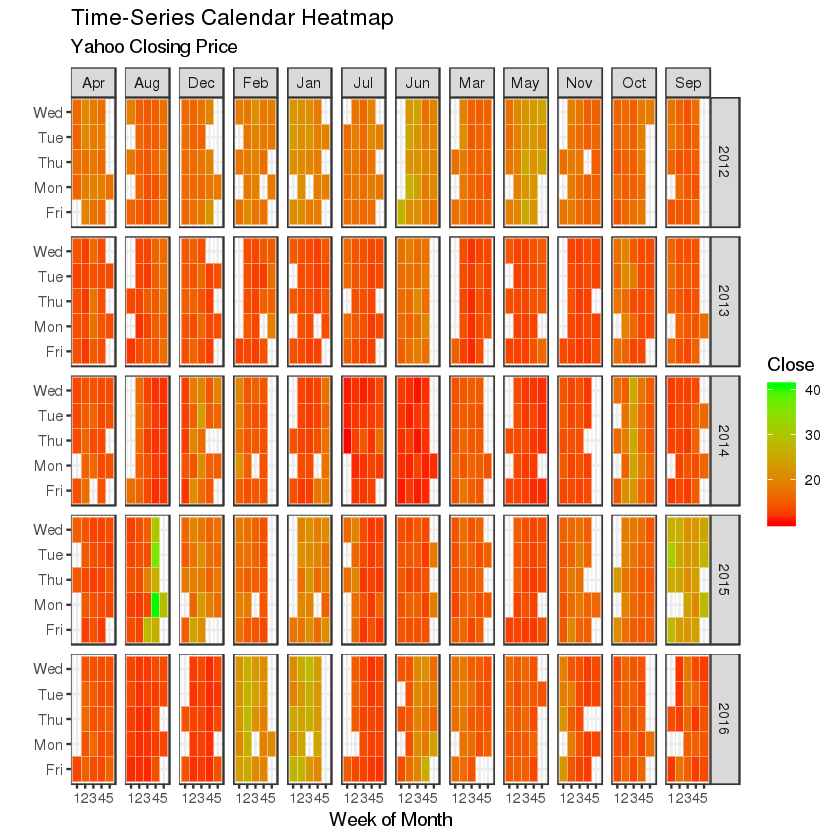

In [41]:
# http://margintale.blogspot.in/2012/04/ggplot2-time-series-heatmaps.html
library(ggplot2)
library(plyr)
library(scales)
library(zoo)

df <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv")
df$date <- as.Date(df$date)  # format date
df <- df[df$year >= 2012, ]  # filter reqd years

# Create Month Week
df$yearmonth <- as.yearmon(df$date)
df$yearmonthf <- factor(df$yearmonth)
df <- ddply(df,.(yearmonthf), transform, monthweek=1+week-min(week))  # compute week number of month
df <- df[, c("year", "yearmonthf", "monthf", "week", "monthweek", "weekdayf", "VIX.Close")]
head(df)
#>   year yearmonthf monthf week monthweek weekdayf VIX.Close
#> 1 2012   Jan 2012    Jan    1         1      Tue     22.97
#> 2 2012   Jan 2012    Jan    1         1      Wed     22.22
#> 3 2012   Jan 2012    Jan    1         1      Thu     21.48
#> 4 2012   Jan 2012    Jan    1         1      Fri     20.63
#> 5 2012   Jan 2012    Jan    2         2      Mon     21.07
#> 6 2012   Jan 2012    Jan    2         2      Tue     20.69


# Plot
ggplot(df, aes(monthweek, weekdayf, fill = VIX.Close)) + 
  geom_tile(colour = "white") + 
  facet_grid(year~monthf) + 
  scale_fill_gradient(low="red", high="green") +
  labs(x="Week of Month",
       y="",
       title = "Time-Series Calendar Heatmap", 
       subtitle="Yahoo Closing Price", 
       fill="Close")


make       mileage 
9  lincoln    11.33333
8  land rover 11.50000
3  dodge      13.13514
10 mercury    13.25000

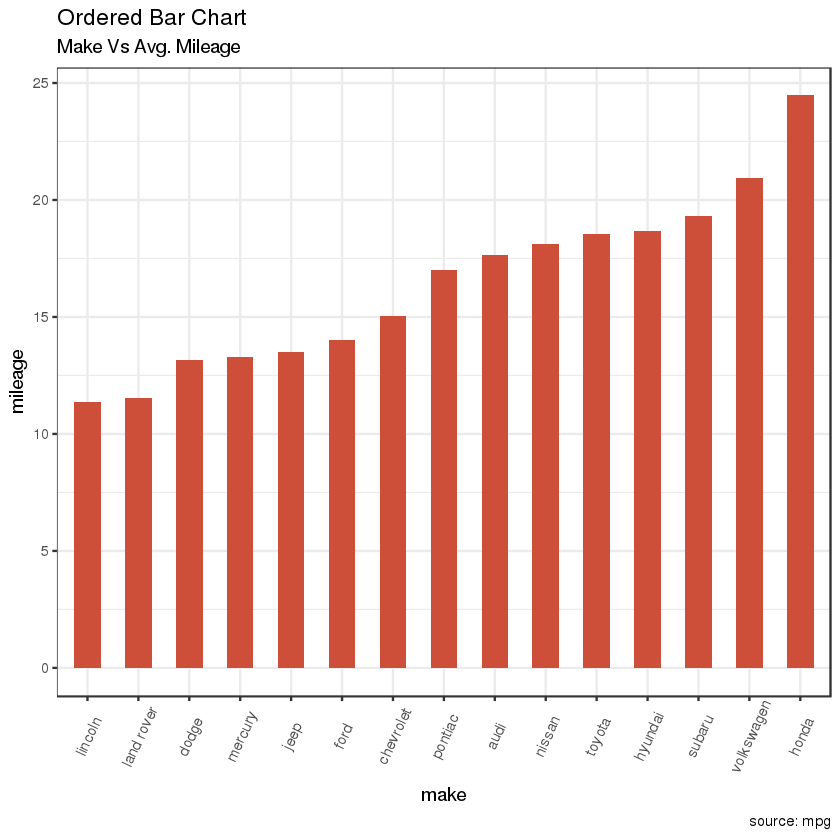

In [42]:
# Prepare data: group mean city mileage by manufacturer.
cty_mpg <- aggregate(mpg$cty, by=list(mpg$manufacturer), FUN=mean)  # aggregate
colnames(cty_mpg) <- c("make", "mileage")  # change column names
cty_mpg <- cty_mpg[order(cty_mpg$mileage), ]  # sort
cty_mpg$make <- factor(cty_mpg$make, levels = cty_mpg$make)  # to retain the order in plot.
head(cty_mpg, 4)
#>          make  mileage
#> 9     lincoln 11.33333
#> 8  land rover 11.50000
#> 3       dodge 13.13514
#> 10    mercury 13.25000

#The X variable is now a factor, let's plot.

library(ggplot2)
theme_set(theme_bw())

# Draw plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Ordered Bar Chart", 
       subtitle="Make Vs Avg. Mileage", 
       caption="source: mpg") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))


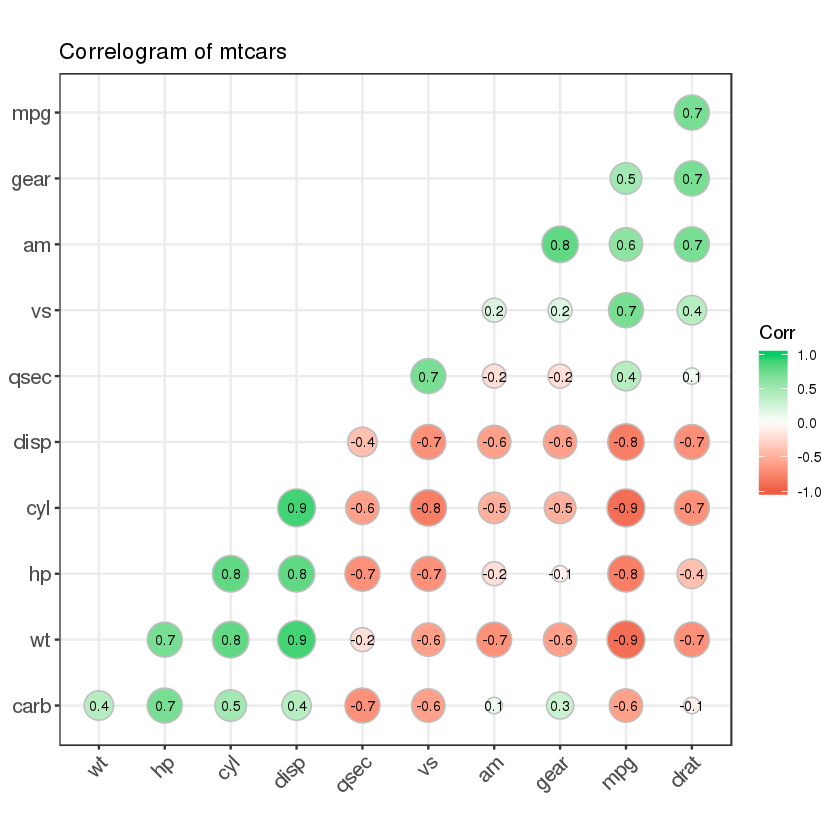

In [43]:
#install.packages("ggcorrplot")
library(ggplot2)
library(ggcorrplot)

# Correlation matrix
data(mtcars)
corr <- round(cor(mtcars), 1)

# Plot
ggcorrplot(corr, hc.order = TRUE, 
           type = "lower", 
           lab = TRUE, 
           lab_size = 3, 
           method="circle", 
           colors = c("tomato2", "white", "springgreen3"), 
           title="Correlogram of mtcars", 
           ggtheme=theme_bw)

region        country       gdp_mil_usd hdi   econ_classification hemisphere
1 Africa        South Africa    384315    0.629 Developing          Southern  
2 North America United States 15684750    0.937 Advanced            Northern  
3 North America Canada         1819081    0.911 Advanced            Northern  
4 North America Mexico         1177116    0.775 Developing          Northern  
5 South America Brazil         2395968    0.730 Developing          Southern  
6 South America Argentina       474954    0.811 Developing          Southern

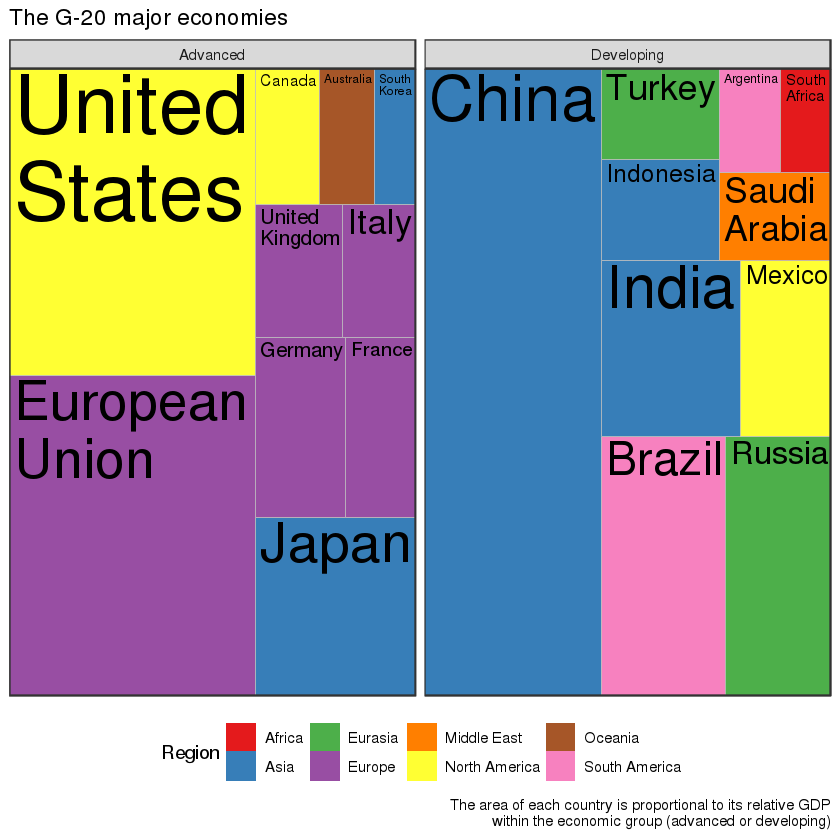

In [44]:
library(devtools)
#devtools::install_github("wilkox/treemapify")
library(treemapify)
library(ggplot2)
data(G20)
head(G20)
#       region       country gdp_mil_usd   hdi econ_classification
#       Africa  South Africa      384315 0.629          Developing
# North America United States    15684750 0.937            Advanced
# North America        Canada     1819081 0.911            Advanced
# North America        Mexico     1177116 0.775          Developing
# South America        Brazil     2395968 0.730          Developing
# South America     Argentina      474954 0.811          Developing

ggplot(G20, aes(area = gdp_mil_usd, fill = region, label = country)) +
  geom_treemap() +
  geom_treemap_text(grow = T, reflow = T, colour = "black") +
  facet_wrap( ~ econ_classification) +
  scale_fill_brewer(palette = "Set1") +
  theme(legend.position = "bottom") +
  labs(
    title = "The G-20 major economies",
    caption = "The area of each country is proportional to its relative GDP
    within the economic group (advanced or developing)",
    fill = "Region"
  )


 Network attributes:
  vertices = 45 
  directed = FALSE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 39 
    missing edges= 0 
    non-missing edges= 39 

 Vertex attribute names: 
    vertex.names 

No edge attributes

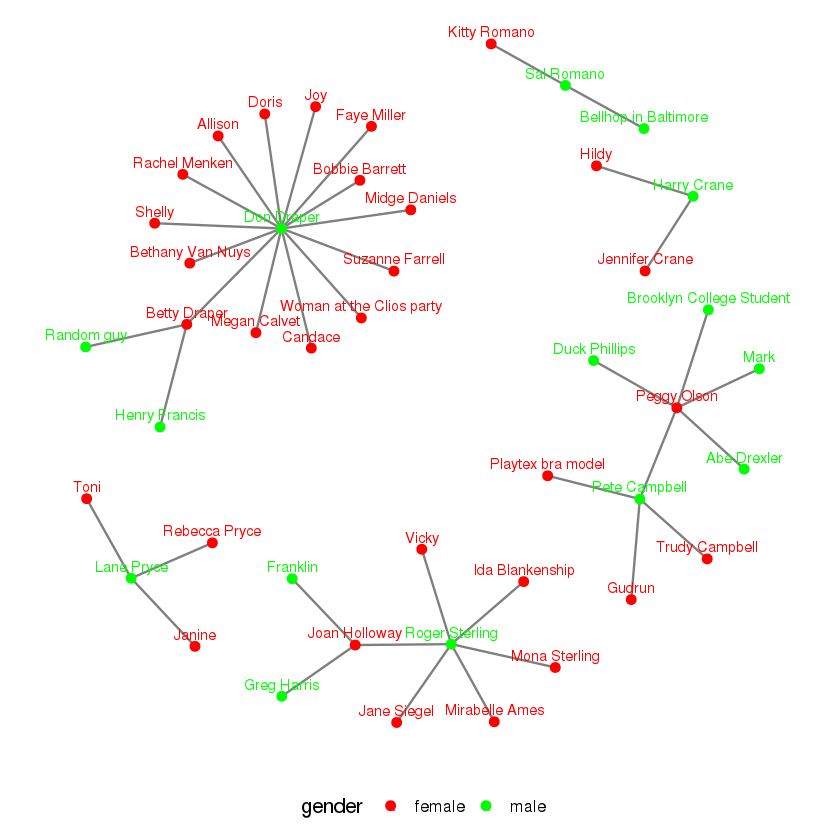

In [75]:
library(ggplot2)
library(ggnetwork)
library(geomnet)
library(network)
# make the data available
data(madmen, package = 'geomnet')
# data step for  ggnetwork
# create undirected network
mm.net <- network(madmen$edges[, 1:2], directed = FALSE)
mm.net # glance at network object
## Network attributes:
## vertices = 45
## directed = FALSE
## hyper = FALSE
## loops = FALSE
## multiple = FALSE
## bipartite = FALSE
## total edges= 39
## missing edges= 0
## non-missing edges= 39
##
## Vertex attribute names:
## vertex.names
## No edge attributes
# create node attribute (gender)
rownames(madmen$vertices) <- madmen$vertices$label
mm.net %v% "gender" <- as.character(
  madmen$vertices[ network.vertex.names(mm.net), "Gender"]
)
# gender color palette
mm.col <- c("female" = "#ff0000", "male" = "#00ff00")
set.seed(10052016)
ggplot(data = ggnetwork(mm.net, layout = "kamadakawai"),
       aes(x, y, xend = xend, yend = yend)) +
  geom_edges(color = "grey50") + # draw edge layer
  geom_nodes(aes(colour = gender), size = 2) + # draw node layer
  geom_nodetext(aes(colour = gender, label = vertex.names),
                size = 3, vjust = -0.6) + # draw node label layer
  scale_colour_manual(values = mm.col) +
  xlim(c(-0.05, 1.05)) +
  theme_blank() +
  theme(legend.position = "bottom")

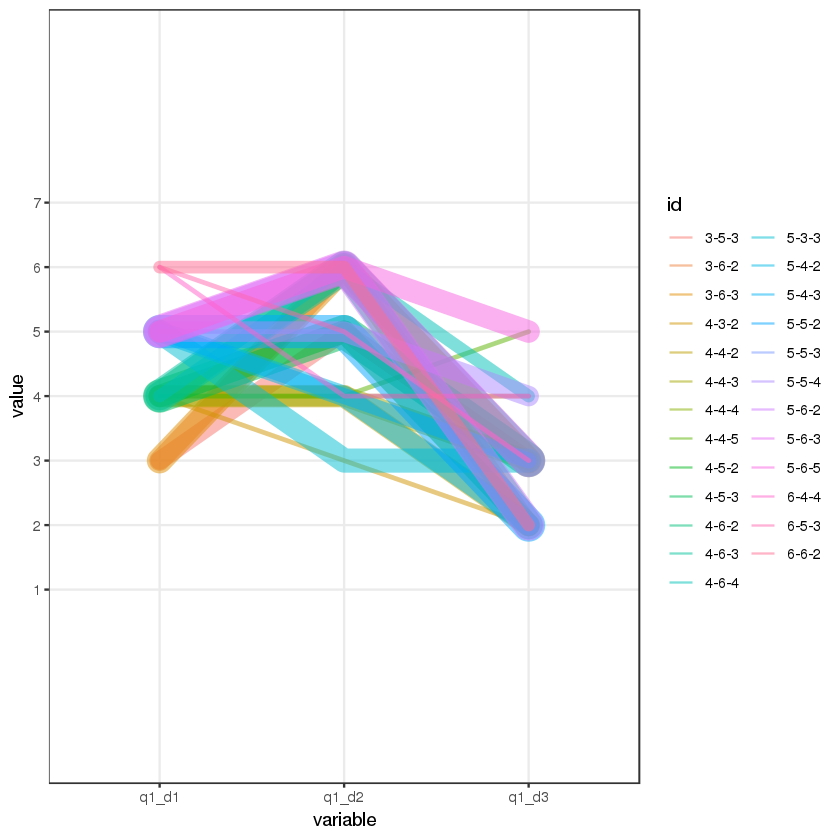

In [68]:
library(triangle)
set.seed(0)

q1_d1 <- round(rtriangle(1000, 1, 7, 5))
q1_d2 <- round(rtriangle(1000, 1, 7, 6))
q1_d3 <- round(rtriangle(1000, 1, 7, 2))
df <- data.frame(q1_d1 = factor(q1_d1), q1_d2 = factor(q1_d2), q1_d3 =  factor(q1_d3))

library(dplyr)

# group by combinations and count
df_grouped <- df %>% group_by(q1_d1, q1_d2, q1_d3) %>% count()

# set an id string that denotes the value combination
df_grouped <- df_grouped %>% mutate(id = factor(paste(q1_d1, q1_d2, q1_d3, sep = '-')))

order.freq <- order(df_grouped[,4],decreasing=TRUE)

# sort by count and select top rows
df_grouped <- df_grouped[order.freq[1:25],]

library(reshape2)
library(ggplot2)
# create long format
df_pcp <- melt(df_grouped, id.vars = c('id', 'freq'))
df_pcp$value <- factor(df_pcp$value)

y_levels <- levels(factor(1:7))
ggplot(df_pcp, aes(x = variable, y = value, group = id)) +   # group = id is important!
  geom_path(aes(size = freq, color = id),
            alpha = 0.5,
            lineend = 'round', linejoin = 'round') +
  scale_y_discrete(limits = y_levels, expand = c(0.5, 0)) +
  scale_size(breaks = NULL, range = c(1, 7))

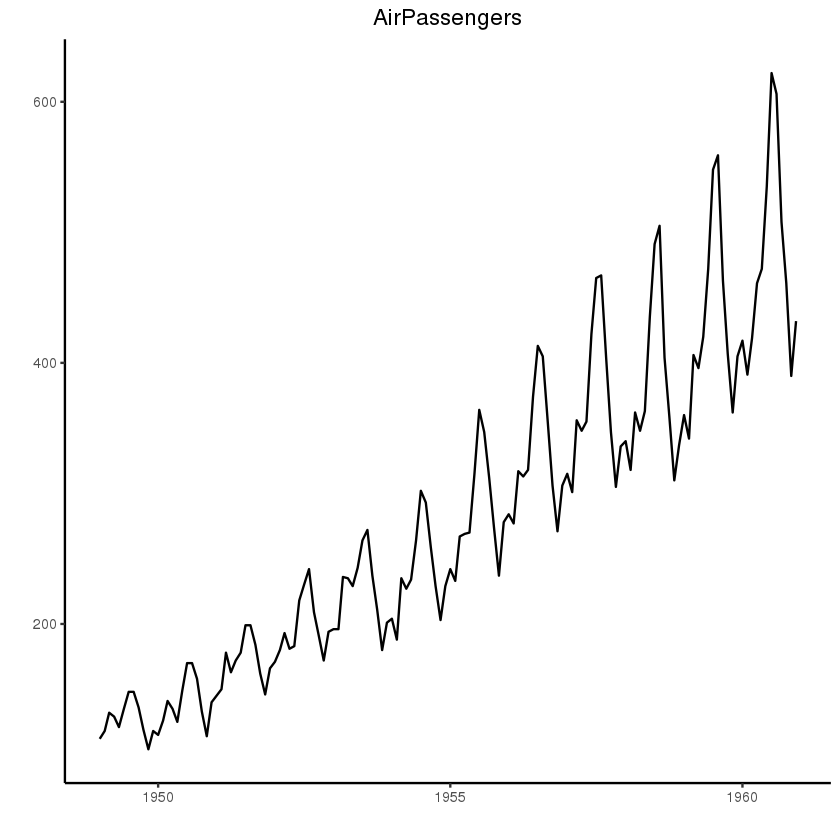

In [76]:
## From Timeseries object (ts)
library(ggplot2)
library(ggfortify)
theme_set(theme_classic())

# Plot 
autoplot(AirPassengers) + 
  labs(title="AirPassengers") + 
  theme(plot.title = element_text(hjust=0.5))

In [ ]:
library(ggplot2)
theme_set(theme_classic())
# Allow Default X Axis Labels
ggplot(economics, aes(x=date)) + 
  geom_line(aes(y=unemploy)) + 
  labs(title="Time Series Chart", 
       subtitle="Number of unemployed in thousands from 'Economics-US' dataset", 
       caption="Source: Economics", 
       y="unemploy")


Attaching package: ‘lubridate’

The following object is masked from ‘package:plyr’:

    here

The following object is masked from ‘package:base’:

    date



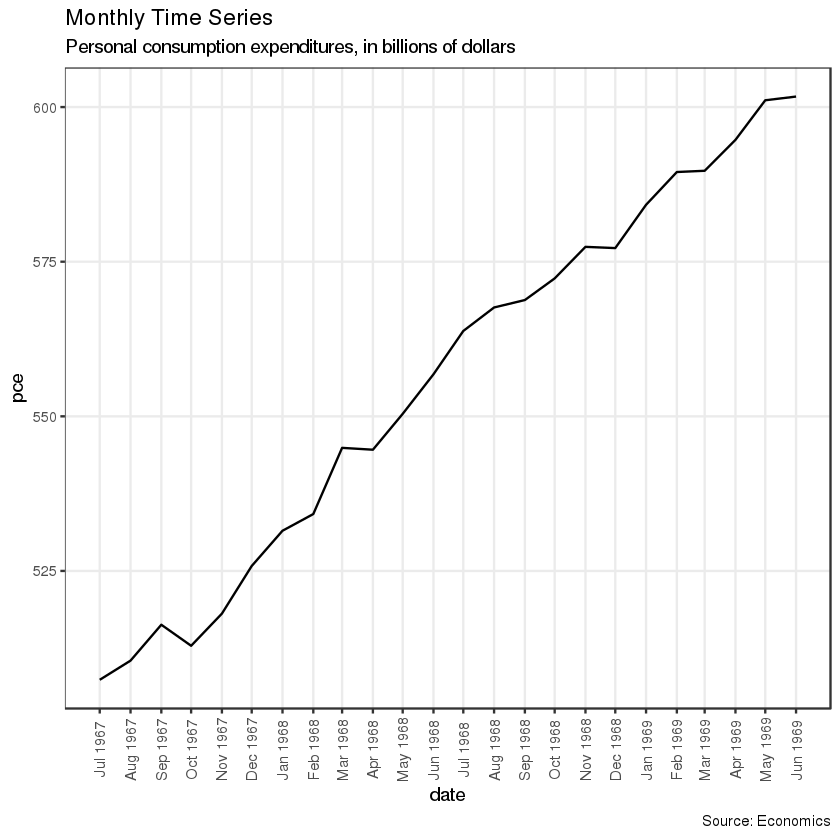

In [78]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

economics_m <- economics[1:24, ]

# labels and breaks for X axis text
lbls <- paste0(month.abb[month(economics_m$date)], " ", lubridate::year(economics_m$date))
brks <- economics_m$date

# plot
ggplot(economics_m, aes(x=date)) + 
  geom_line(aes(y=pce)) + 
  labs(title="Monthly Time Series", 
       subtitle="Personal consumption expenditures, in billions of dollars", 
       caption="Source: Economics", 
       y="pce") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

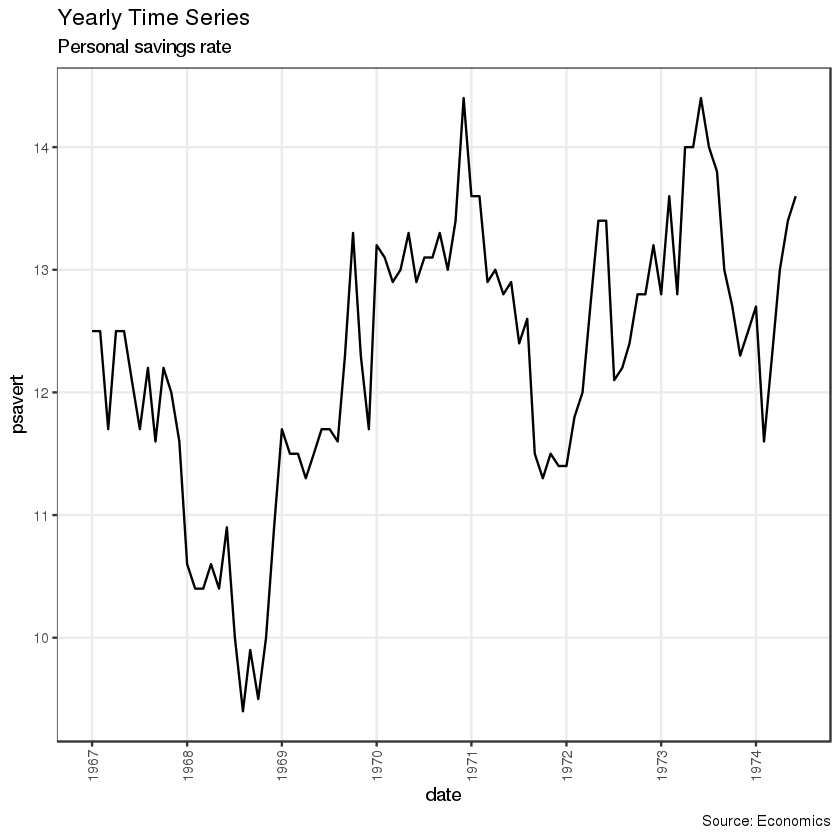

In [79]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

economics_y <- economics[1:90, ]

# labels and breaks for X axis text
brks <- economics_y$date[seq(1, length(economics_y$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(economics_y, aes(x=date)) + 
  geom_line(aes(y=psavert)) + 
  labs(title="Yearly Time Series", 
       subtitle="Personal savings rate", 
       caption="Source: Economics", 
       y="psavert") +  # title and caption
  scale_x_date(labels = lbls, 
               breaks = brks) +  # change to monthly ticks and labels
  theme(axis.text.x = element_text(angle = 90, vjust=0.5),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

date       variable value value01     
1 1967-07-01 pce      507.4 0.0000000000
2 1967-08-01 pce      510.5 0.0002660008
3 1967-09-01 pce      516.3 0.0007636797
4 1967-10-01 pce      512.9 0.0004719369
5 1967-11-01 pce      518.1 0.0009181318
6 1967-12-01 pce      525.8 0.0015788435

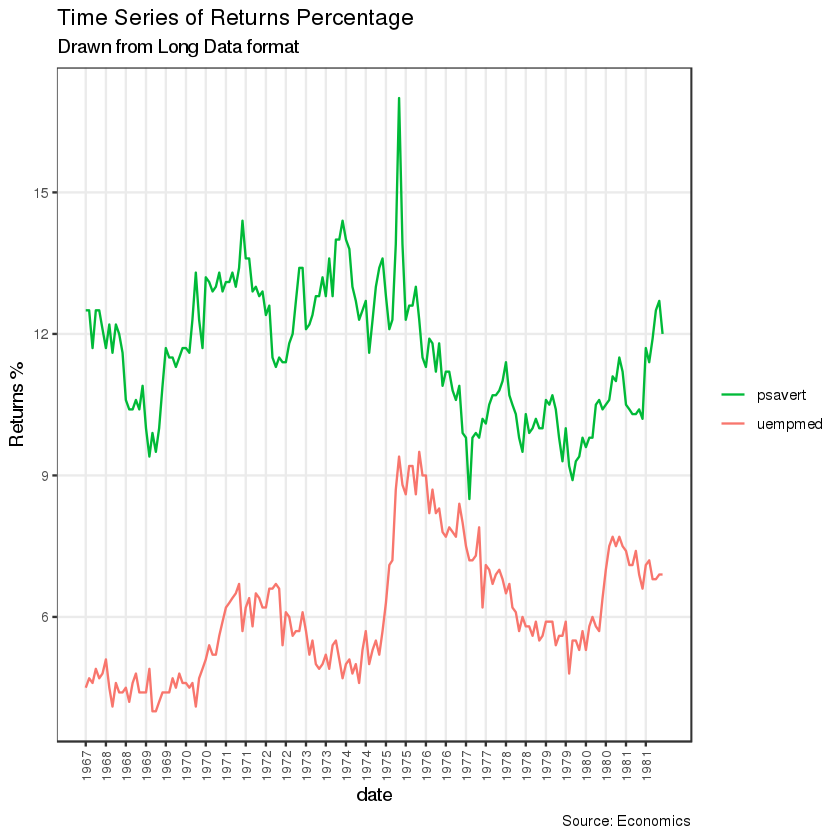

In [80]:
data(economics_long, package = "ggplot2")
head(economics_long)
#>         date variable value      value01
#>       <date>   <fctr> <dbl>        <dbl>
#> 1 1967-07-01      pce 507.4 0.0000000000
#> 2 1967-08-01      pce 510.5 0.0002660008
#> 3 1967-09-01      pce 516.3 0.0007636797
#> 4 1967-10-01      pce 512.9 0.0004719369
#> 5 1967-11-01      pce 518.1 0.0009181318
#> 6 1967-12-01      pce 525.8 0.0015788435
library(ggplot2)
library(lubridate)
theme_set(theme_bw())
df <- economics_long[economics_long$variable %in% c("psavert", "uempmed"), ]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_line(aes(y=value, col=variable)) + 
  labs(title="Time Series of Returns Percentage", 
       subtitle="Drawn from Long Data format", 
       caption="Source: Economics", 
       y="Returns %", 
       color=NULL) +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_color_manual(labels = c("psavert", "uempmed"), 
                     values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(axis.text.x = element_text(angle = 90, vjust=0.5, size = 8),  # rotate x axis text
        panel.grid.minor = element_blank())  # turn off minor grid

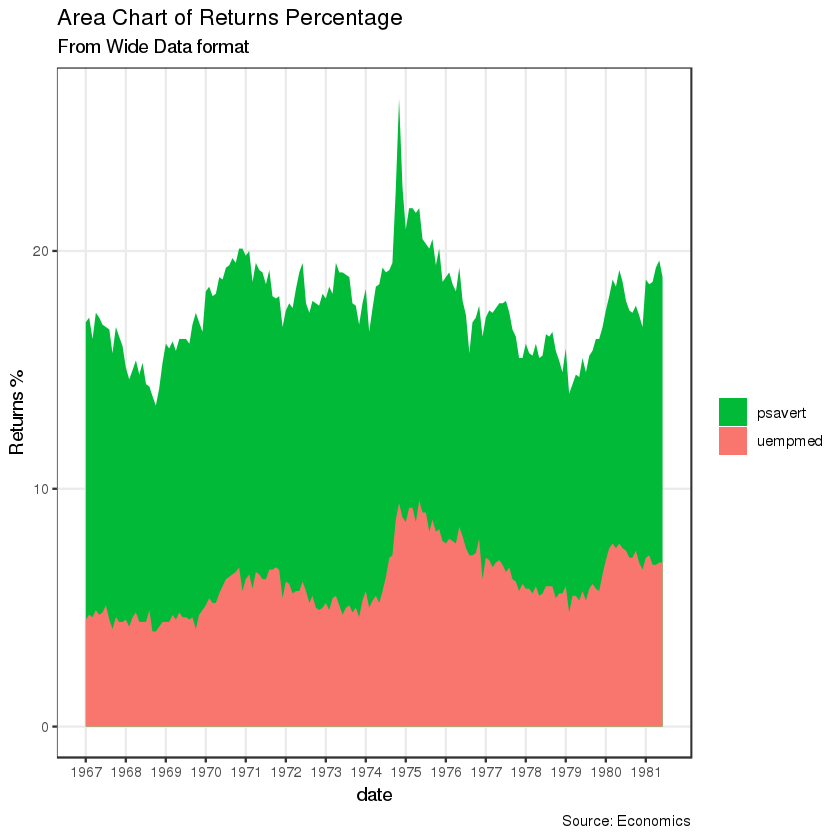

In [81]:
library(ggplot2)
library(lubridate)
theme_set(theme_bw())

df <- economics[, c("date", "psavert", "uempmed")]
df <- df[lubridate::year(df$date) %in% c(1967:1981), ]

# labels and breaks for X axis text
brks <- df$date[seq(1, length(df$date), 12)]
lbls <- lubridate::year(brks)

# plot
ggplot(df, aes(x=date)) + 
  geom_area(aes(y=psavert+uempmed, fill="psavert")) + 
  geom_area(aes(y=uempmed, fill="uempmed")) + 
  labs(title="Area Chart of Returns Percentage", 
       subtitle="From Wide Data format", 
       caption="Source: Economics", 
       y="Returns %") +  # title and caption
  scale_x_date(labels = lbls, breaks = brks) +  # change to monthly ticks and labels
  scale_fill_manual(name="", 
                    values = c("psavert"="#00ba38", "uempmed"="#f8766d")) +  # line color
  theme(panel.grid.minor = element_blank())  # turn off minor grid

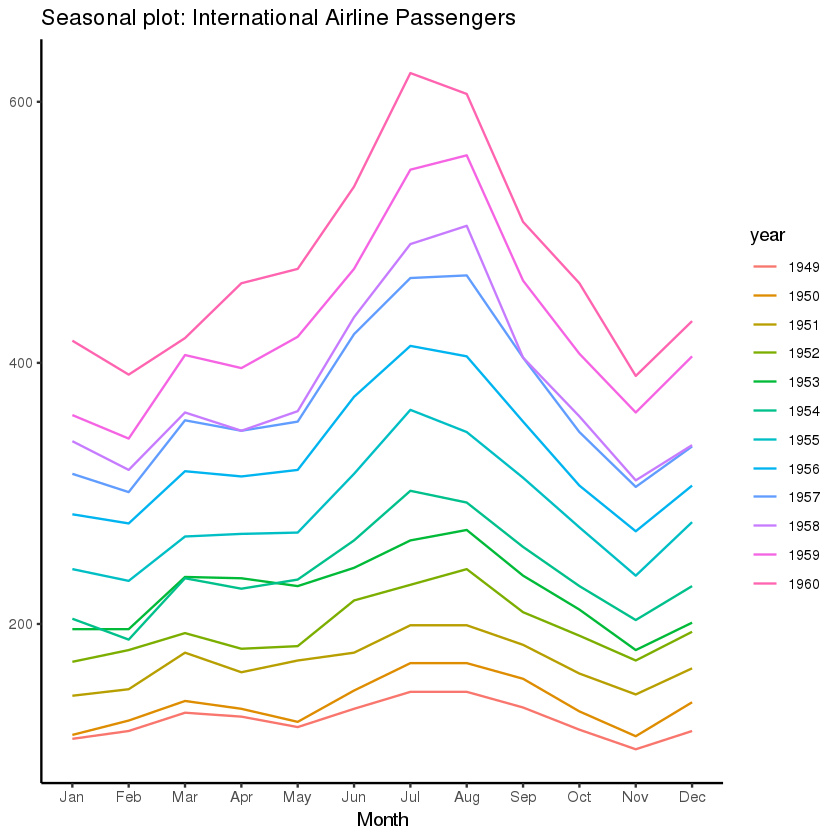

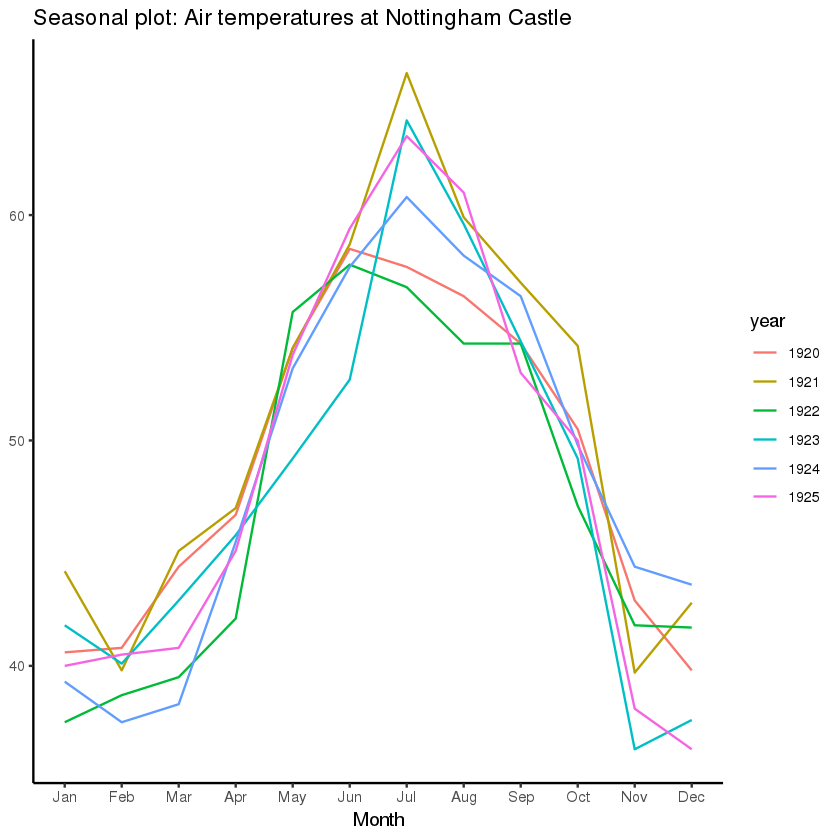

In [82]:
library(ggplot2)
library(forecast)
theme_set(theme_classic())

# Subset data
nottem_small <- window(nottem, start=c(1920, 1), end=c(1925, 12))  # subset a smaller timewindow

# Plot
ggseasonplot(AirPassengers) + labs(title="Seasonal plot: International Airline Passengers")
ggseasonplot(nottem_small) + labs(title="Seasonal plot: Air temperatures at Nottingham Castle")


In [83]:
# devtools::install_github("hrbrmstr/ggalt")
library(ggplot2)
library(ggalt)
library(ggfortify)
theme_set(theme_classic())
# Compute data with principal components ------------------
df <- iris[c(1, 2, 3, 4)]
pca_mod <- prcomp(df)  # compute principal components
# Data frame of principal components ----------------------
df_pc <- data.frame(pca_mod$x, Species=iris$Species)  # dataframe of principal components
df_pc_vir <- df_pc[df_pc$Species == "virginica", ]  # df for 'virginica'
df_pc_set <- df_pc[df_pc$Species == "setosa", ]  # df for 'setosa'
df_pc_ver <- df_pc[df_pc$Species == "versicolor", ]  # df for 'versicolor'

# Plot ----------------------------------------------------
clustering<-ggplot(df_pc, aes(PC1, PC2, col=Species)) + 
  geom_point(aes(shape=Species), size=2) +   # draw points
  labs(title="Iris Clustering", 
       subtitle="With principal components PC1 and PC2 as X and Y axis",
       caption="Source: Iris") + 
  coord_cartesian(xlim = 1.2 * c(min(df_pc$PC1), max(df_pc$PC1)), 
                  ylim = 1.2 * c(min(df_pc$PC2), max(df_pc$PC2))) +   # change axis limits
  geom_encircle(data = df_pc_vir, aes(x=PC1, y=PC2)) +   # draw circles
  geom_encircle(data = df_pc_set, aes(x=PC1, y=PC2)) + 
  geom_encircle(data = df_pc_ver, aes(x=PC1, y=PC2))

ggsave(file="clusters.png", plot=clustering, width=5, height=4) # saved, not plotted

Warning message:
“Ignoring unknown parameters: point.colour.l”

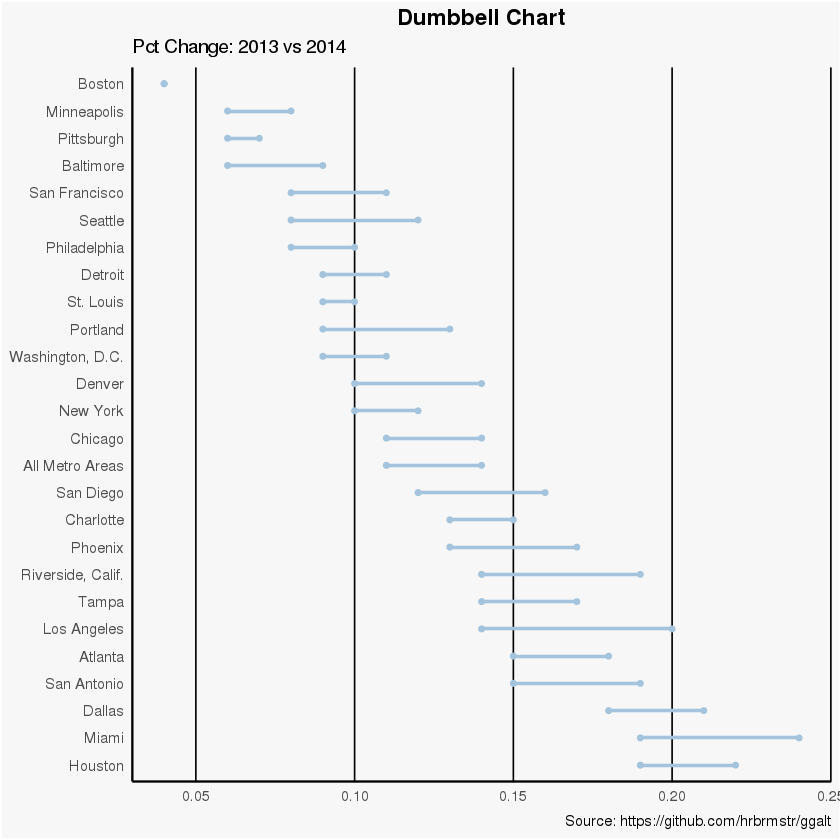

In [85]:
# devtools::install_github("hrbrmstr/ggalt")
library(ggplot2)
library(ggalt)
theme_set(theme_classic())

health <- read.csv("https://raw.githubusercontent.com/selva86/datasets/master/health.csv")

# for right ordering of the dumbells
health$Area <- factor(health$Area, levels=as.character(health$Area))  
# health$Area <- factor(health$Area)
gg <- ggplot(health, aes(x=pct_2013, xend=pct_2014, y=Area, group=Area)) + 
        geom_dumbbell(color="#a3c4dc", 
                      size=0.75, 
                      point.colour.l="#0e668b") + 
        scale_x_continuous(label=waiver()) + 
        labs(x=NULL, 
             y=NULL, 
             title="Dumbbell Chart", 
             subtitle="Pct Change: 2013 vs 2014", 
             caption="Source: https://github.com/hrbrmstr/ggalt") +
        theme(plot.title = element_text(hjust=0.5, face="bold"),
              plot.background=element_rect(fill="#f7f7f7"),
              panel.background=element_rect(fill="#f7f7f7"),
              panel.grid.minor=element_blank(),
              panel.grid.major.y=element_blank(),
              panel.grid.major.x=element_line(),
              axis.ticks=element_blank(),
              legend.position="top",
              panel.border=element_blank())
plot(gg)


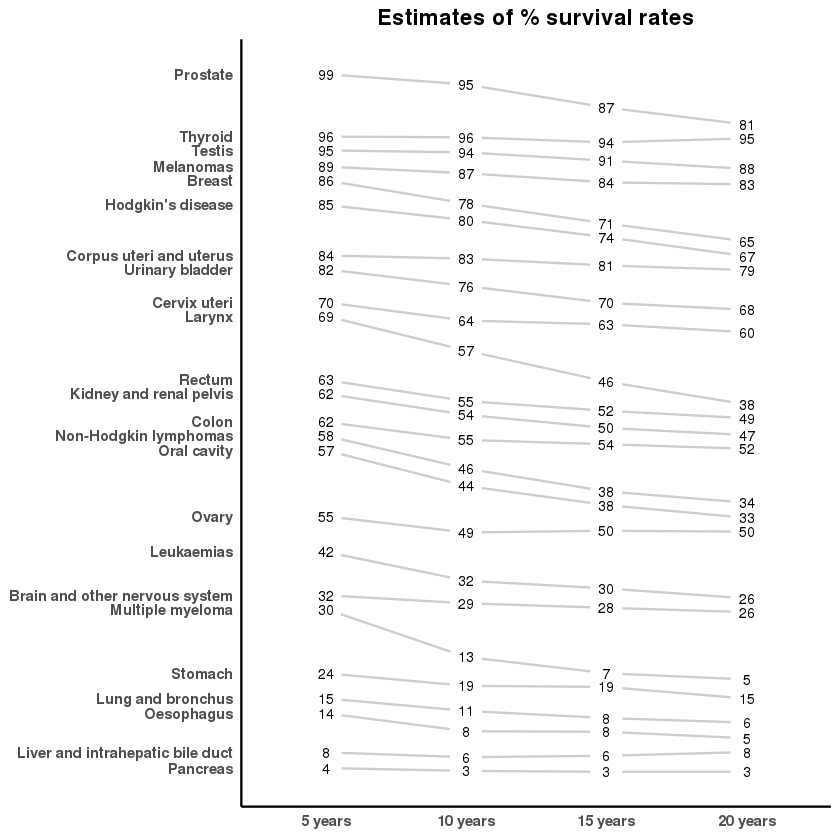

In [86]:
library(dplyr)
theme_set(theme_classic())
source_df <- read.csv("https://raw.githubusercontent.com/jkeirstead/r-slopegraph/master/cancer_survival_rates.csv")

# Define functions. Source: https://github.com/jkeirstead/r-slopegraph
tufte_sort <- function(df, x="year", y="value", group="group", method="tufte", min.space=0.05) {
    ## First rename the columns for consistency
    ids <- match(c(x, y, group), names(df))
    df <- df[,ids]
    names(df) <- c("x", "y", "group")

    ## Expand grid to ensure every combination has a defined value
    tmp <- expand.grid(x=unique(df$x), group=unique(df$group))
    tmp <- merge(df, tmp, all.y=TRUE)
    df <- mutate(tmp, y=ifelse(is.na(y), 0, y))
  
    ## Cast into a matrix shape and arrange by first column
    require(reshape2)
    tmp <- dcast(df, group ~ x, value.var="y")
    ord <- order(tmp[,2])
    tmp <- tmp[ord,]
    
    min.space <- min.space*diff(range(tmp[,-1]))
    yshift <- numeric(nrow(tmp))
    ## Start at "bottom" row
    ## Repeat for rest of the rows until you hit the top
    for (i in 2:nrow(tmp)) {
        ## Shift subsequent row up by equal space so gap between
        ## two entries is >= minimum
        mat <- as.matrix(tmp[(i-1):i, -1])
        d.min <- min(diff(mat))
        yshift[i] <- ifelse(d.min < min.space, min.space - d.min, 0)
    }

    
    tmp <- cbind(tmp, yshift=cumsum(yshift))

    scale <- 1
    tmp <- melt(tmp, id=c("group", "yshift"), variable.name="x", value.name="y")
    ## Store these gaps in a separate variable so that they can be scaled ypos = a*yshift + y

    tmp <- transform(tmp, ypos=y + scale*yshift)
    return(tmp)
   
}
plot_slopegraph <- function(df) {
    ylabs <- subset(df, x==head(x,1))$group
    yvals <- subset(df, x==head(x,1))$ypos
    fontSize <- 3
    gg <- ggplot(df,aes(x=x,y=ypos)) +
        geom_line(aes(group=group),colour="grey80") +
        geom_point(colour="white",size=8) +
        geom_text(aes(label=y), size=fontSize, family="American Typewriter") +
        scale_y_continuous(name="", breaks=yvals, labels=ylabs)
    return(gg)
}    

## Prepare data    
df <- tufte_sort(source_df, 
                 x="year", 
                 y="value", 
                 group="group", 
                 method="tufte", 
                 min.space=0.05)

df <- transform(df, 
                x=factor(x, levels=c(5,10,15,20), 
                            labels=c("5 years","10 years","15 years","20 years")), 
                y=round(y))

## Plot
plot_slopegraph(df) + labs(title="Estimates of % survival rates") + 
                      theme(axis.title=element_blank(),
                            axis.ticks = element_blank(),
                            plot.title = element_text(hjust=0.5,
                                                      family = "American Typewriter",
                                                      face="bold"),
                            axis.text = element_text(family = "American Typewriter",
                                                     face="bold"))

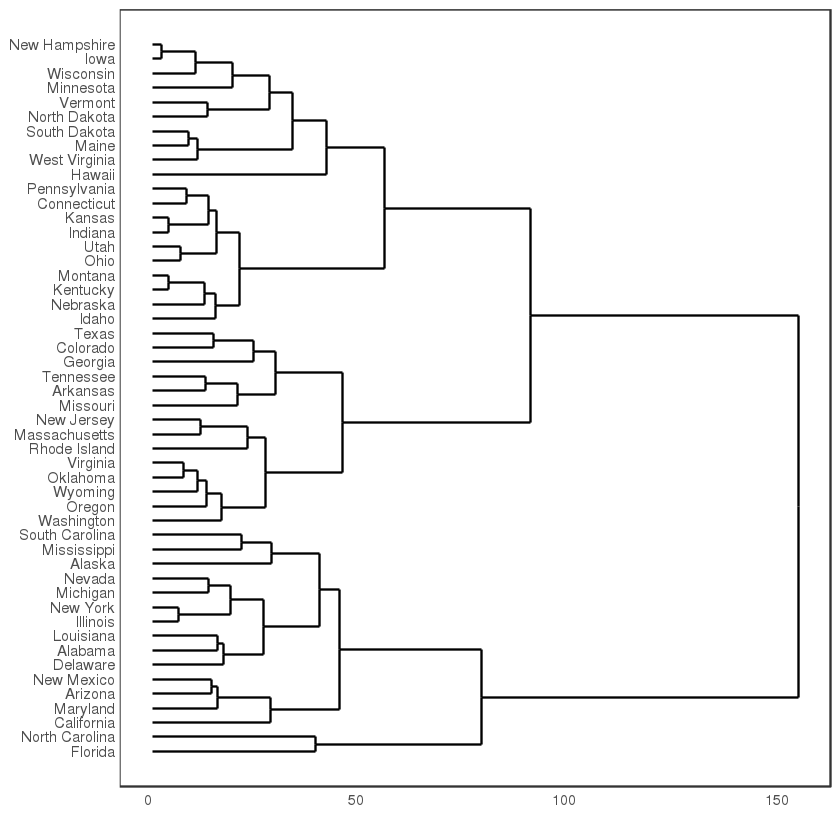

In [87]:
#install.packages("ggdendro")
library("ggplot2")
library("ggdendro")
theme_set(theme_bw())
hc <- hclust(dist(USArrests), "ave")  # hierarchical clustering
# plot
ggdendrogram(hc, rotate = TRUE, size = 2)


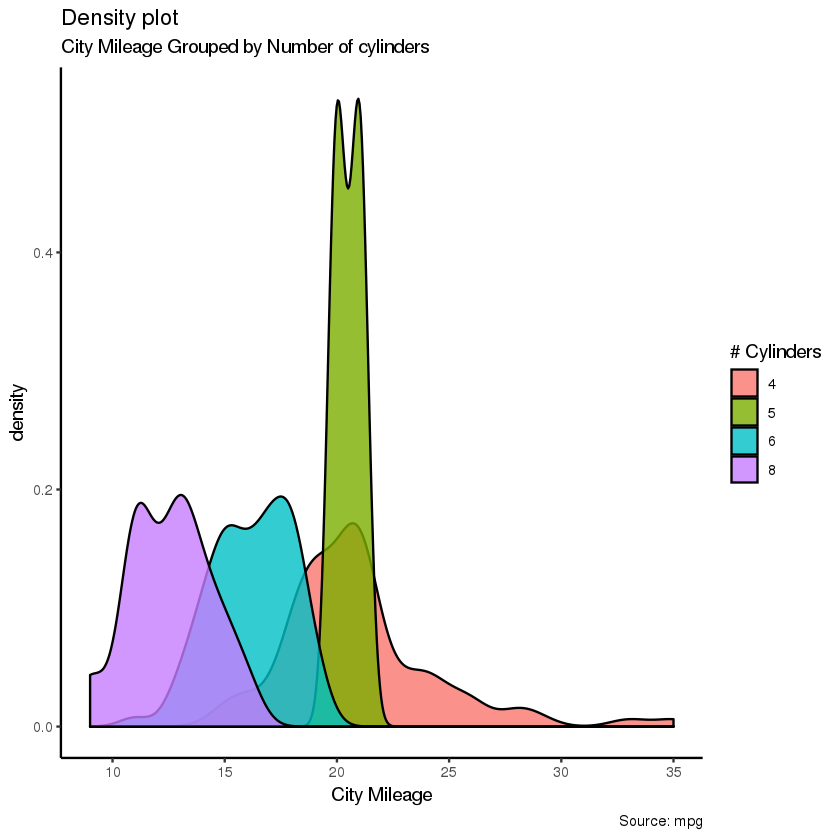

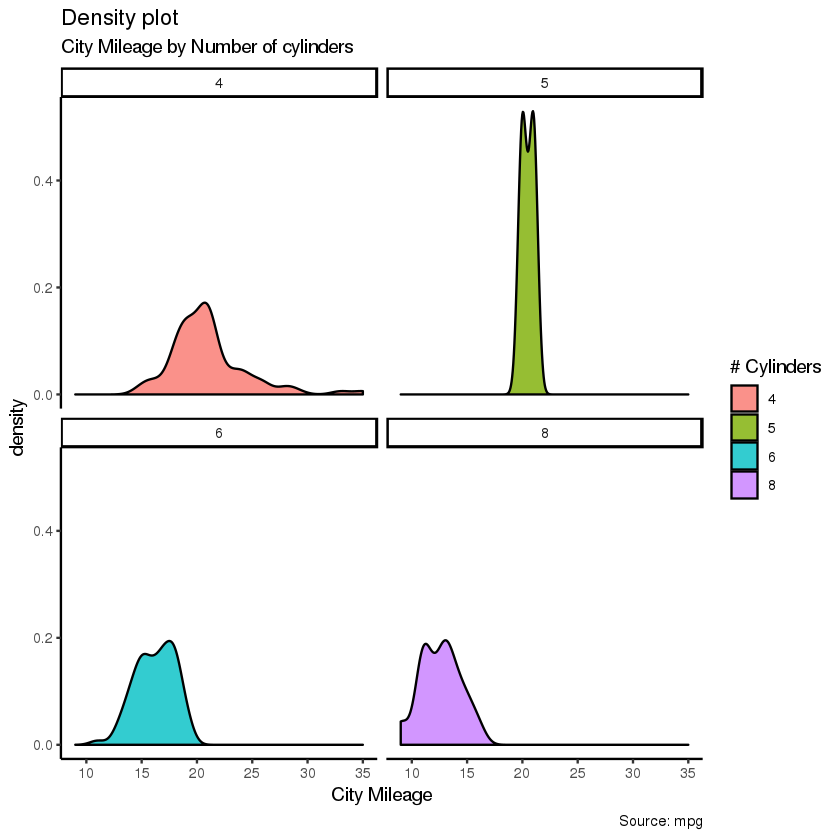

In [5]:
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Density plot", 
         subtitle="City Mileage Grouped by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

h <- ggplot(mpg, aes(cty))
h + geom_density(aes(x=cty,fill=factor(cyl)),alpha=0.8) + facet_wrap(~cyl) +    
labs(title="Density plot", 
         subtitle="City Mileage by Number of cylinders",
         caption="Source: mpg",
         x="City Mileage",
         fill="# Cylinders")

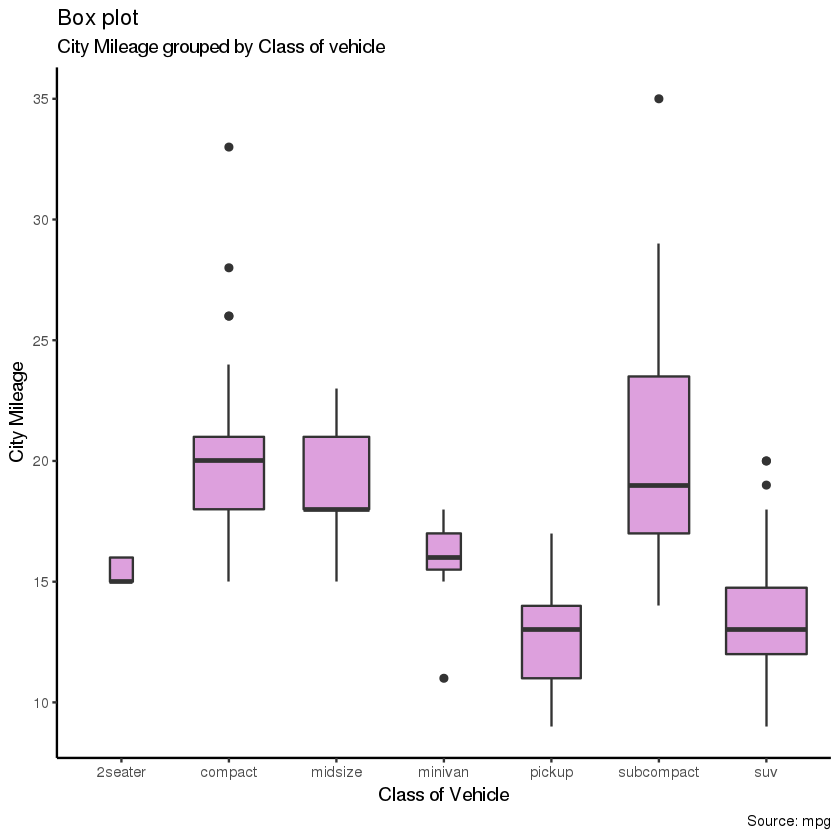

In [89]:
library(ggplot2)
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="City Mileage grouped by Class of vehicle",
         caption="Source: mpg",
         x="Class of Vehicle",
         y="City Mileage")


`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


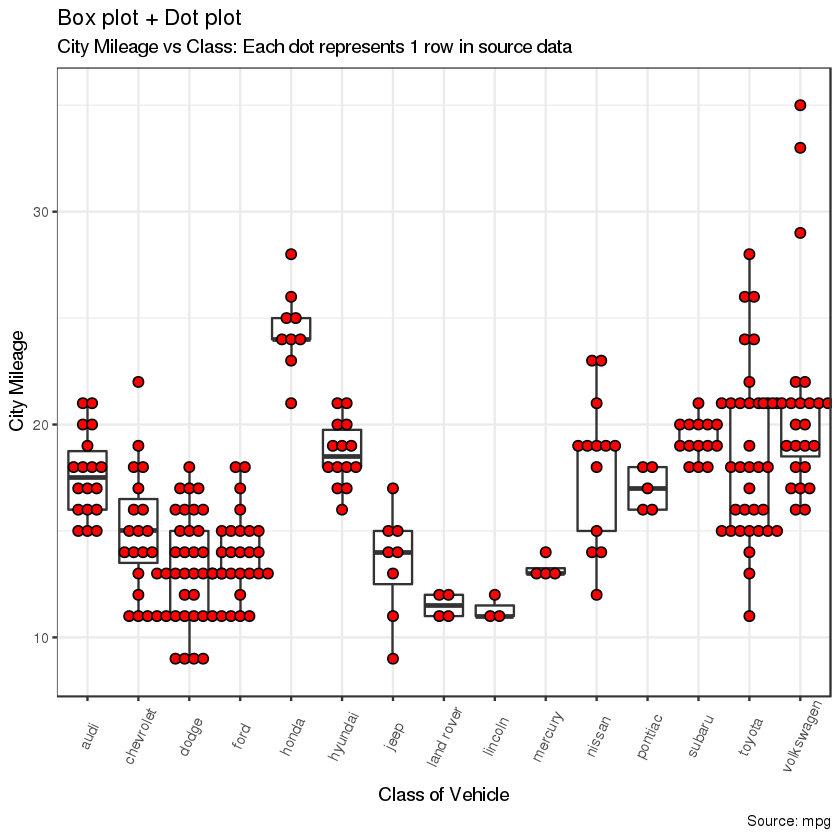

In [90]:
library(ggplot2)
theme_set(theme_bw())

# plot
g <- ggplot(mpg, aes(manufacturer, cty))
g + geom_boxplot() + 
  geom_dotplot(binaxis='y', 
               stackdir='center', 
               dotsize = .5, 
               fill="red") +
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Box plot + Dot plot", 
       subtitle="City Mileage vs Class: Each dot represents 1 row in source data",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

var
   2seater    compact    midsize    minivan     pickup subcompact        suv 
         2         20         18          5         14         15         26 

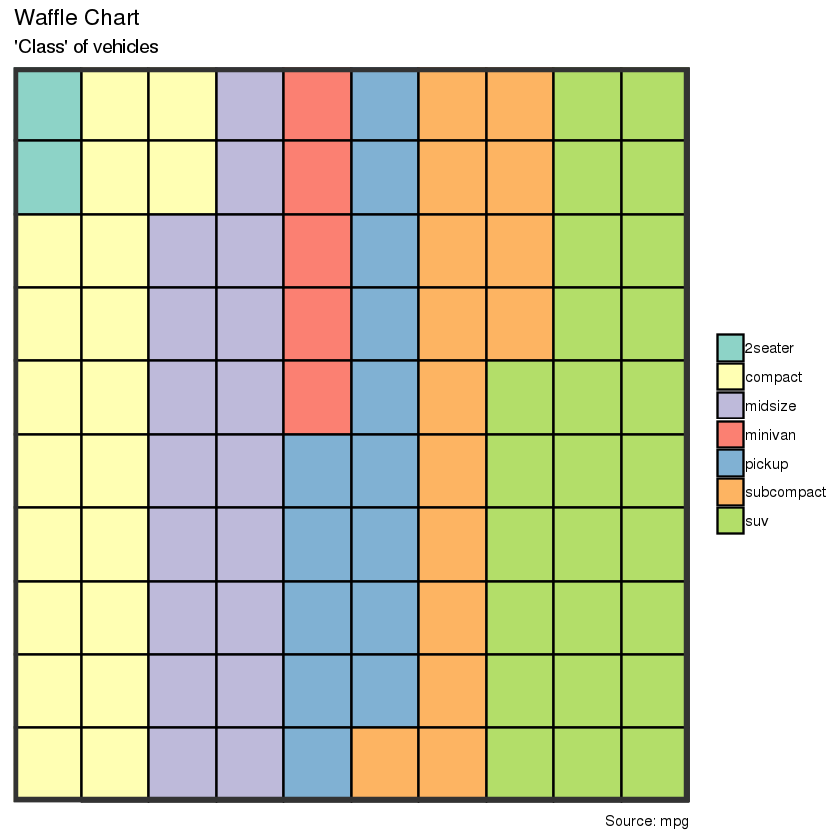

In [91]:
library(ggplot2)
var <- mpg$class  # the categorical data 
## Prep data (nothing to change here)
nrows <- 10
df <- expand.grid(y = 1:nrows, x = 1:nrows)
categ_table <- round(table(var) * ((nrows*nrows)/(length(var))))
categ_table
#>   2seater    compact    midsize    minivan     pickup subcompact        suv 
#>         2         20         18          5         14         15         26 
df$category <- factor(rep(names(categ_table), categ_table))  
# NOTE: if sum(categ_table) is not 100 (i.e. nrows^2), it will need adjustment to make the sum to 100.
## Plot
ggplot(df, aes(x = x, y = y, fill = category)) + 
        geom_tile(color = "black", size = 0.5) +
        scale_x_continuous(expand = c(0, 0)) +
        scale_y_continuous(expand = c(0, 0), trans = 'reverse') +
        scale_fill_brewer(palette = "Set3") +
        labs(title="Waffle Chart", subtitle="'Class' of vehicles",
             caption="Source: mpg") + 
        theme(panel.border = element_rect(size = 2),
              plot.title = element_text(size = rel(1.2)),
              axis.text = element_blank(),
              axis.title = element_blank(),
              axis.ticks = element_blank(),
              legend.title = element_blank(),
              legend.position = "right")
